
### **Home Credit Indonesia**
#### Virtual Internship Experience

Periode : 03/2023
<br>

Update : 27/08/2023
- Improve ROC-AUC dari 69% ke 73%
- Improve akurasi dari 83% ke 87%
- Deploy model menggunakan streamlit
---

# **Load and Read Dataset**

In [2]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# data untuk traing model
df = pd.read_csv('application_train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# **Data Cleansing**

### Missing Value
---

In [5]:
data_null = (df.isna().sum()/len(df)).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
data_null

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

Drop fitur yang memiliki missing value lebih besar dari 40-50%

In [6]:
missing_cols_to_drop = data_null[data_null > 0.4].index
df.drop(columns=missing_cols_to_drop, inplace=True)

<br>

Missing value dibawah 40% perlu dilakukan tretment berupa imputation nilai sebagai berikut:
- Untuk fitur-fitur **numerikal** disi menggunakan nilai **median** karena median ini bersifat **robust**
- Untuk fitur-fitur **kategorikal** dapat dilihat terlebih dahulu bagaimana **distribusi jumalah valuenya**. Hal ini dilakukan untuk menghindari bias apabila dilakukan imputasi dengan modus atau nilai terbanyak.

In [7]:
miss_col_to_handling = data_null[(data_null != 0.000000) & (data_null < 0.4)].index
for i in miss_col_to_handling:
    print(f'{i}: ({df[i].dtype})')

OCCUPATION_TYPE: (object)
EXT_SOURCE_3: (float64)
AMT_REQ_CREDIT_BUREAU_HOUR: (float64)
AMT_REQ_CREDIT_BUREAU_DAY: (float64)
AMT_REQ_CREDIT_BUREAU_WEEK: (float64)
AMT_REQ_CREDIT_BUREAU_MON: (float64)
AMT_REQ_CREDIT_BUREAU_QRT: (float64)
AMT_REQ_CREDIT_BUREAU_YEAR: (float64)
NAME_TYPE_SUITE: (object)
OBS_30_CNT_SOCIAL_CIRCLE: (float64)
DEF_30_CNT_SOCIAL_CIRCLE: (float64)
OBS_60_CNT_SOCIAL_CIRCLE: (float64)
DEF_60_CNT_SOCIAL_CIRCLE: (float64)
EXT_SOURCE_2: (float64)
AMT_GOODS_PRICE: (float64)
AMT_ANNUITY: (float64)
CNT_FAM_MEMBERS: (float64)
DAYS_LAST_PHONE_CHANGE: (float64)


In [8]:
# fitur numerikal
df.fillna(df.median(), inplace=True)

<br>

`OCCUPATION_TYPE`

In [9]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [10]:
df['OCCUPATION_TYPE'].isna().sum()

96391

Pada kolom **`OCCUPATION_TYPE`** 96391 yang mana jumlah ini cukup besar dibandingkan dengan jumlah (count) pada setiap value. Dengan persentasi missing value 30% dan cukup banyak nilai unik nilai fiturnya maka fitur ini akan **di-drop**.
<br>


In [11]:
# drop fitur
df.drop(columns='OCCUPATION_TYPE', inplace = True)

<br>

`NAME_TYPE_SUITE`

In [12]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [13]:
df['NAME_TYPE_SUITE'].isna().sum()

1292

Pada kolom **`NAME_TYPE_SUITE`** missing value dapat diisi dengan **Other_C**

In [14]:
# isi null dengan value baru
df['NAME_TYPE_SUITE'].fillna('Other_C', inplace = True)

<br>
Mengecek apakah missing value sudah tidak ada.

In [15]:
df.isna().sum().sum()

0

### Duplicated
---

In [16]:
df.duplicated().sum()

0

Tidak ada data duplikat.

### Check Unique Value
---

#### **Fitur Numerikal**

In [17]:
for col in df.columns:
    if df[col].dtypes != 'object':
        print("{} : {} unique val".format(col, df[col].nunique()))
        print("sample values: {}".format(df[col].unique()[:5]))
        print('-'*100)

SK_ID_CURR : 307511 unique val
sample values: [100002 100003 100004 100006 100007]
----------------------------------------------------------------------------------------------------
TARGET : 2 unique val
sample values: [1 0]
----------------------------------------------------------------------------------------------------
CNT_CHILDREN : 15 unique val
sample values: [0 1 2 3 4]
----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL : 2548 unique val
sample values: [202500. 270000.  67500. 135000. 121500.]
----------------------------------------------------------------------------------------------------
AMT_CREDIT : 5603 unique val
sample values: [ 406597.5 1293502.5  135000.   312682.5  513000. ]
----------------------------------------------------------------------------------------------------
AMT_ANNUITY : 13672 unique val
sample values: [24700.5 35698.5  6750.  29686.5 21865.5]
-------------------------------------

Pada fitur `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_REGISTRATION`, `DAYS_ID_PUBLISH` memiliki nilai negatif dan dapat di **transformasikan menjadi tahun**.

In [18]:
df['AGE'] = df['DAYS_BIRTH'].apply(lambda x: np.round(-x/365))
df['YEAR_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: np.round(-x/365))
df['YEAR_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: np.round(-x/365))
df['YEAR_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: np.round(-x/365))
df['MONTH_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.round(-x/30))
# -----------------------------------------------------------------------------------------------------
df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], inplace=True)

In [19]:
df[['AGE','YEAR_EMPLOYED','YEAR_REGISTRATION','YEAR_ID_PUBLISH', 'MONTH_LAST_PHONE_CHANGE']].describe()

,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,MONTH_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.938646,-174.895337,13.659440,8.198575,32.091470
std,11.964047,387.185661,9.659369,4.151520,27.564774
min,21.000000,-1001.000000,0.000000,0.000000,-0.000000
25%,34.000000,1.000000,6.000000,5.000000,9.000000
50%,43.000000,3.000000,12.000000,9.000000,25.000000
75%,54.000000,8.000000,20.000000,12.000000,52.000000
max,69.000000,49.000000,68.000000,20.000000,143.000000


Masih terdapat nilai negatif, nilai dapat dijadikan absolut.

In [20]:
df[['YEAR_EMPLOYED', 'MONTH_LAST_PHONE_CHANGE']] = df[['YEAR_EMPLOYED', 'MONTH_LAST_PHONE_CHANGE']].abs()

In [21]:
df[['AGE','YEAR_EMPLOYED','YEAR_REGISTRATION','YEAR_ID_PUBLISH', 'MONTH_LAST_PHONE_CHANGE']].describe()

,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,MONTH_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.938646,185.608021,13.659440,8.198575,32.091470
std,11.964047,382.165887,9.659369,4.151520,27.564774
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.000000,6.000000,5.000000,9.000000
50%,43.000000,6.000000,12.000000,9.000000,25.000000
75%,54.000000,16.000000,20.000000,12.000000,52.000000
max,69.000000,1001.000000,68.000000,20.000000,143.000000


#### **Fitur Kategorikal**

In [22]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print("{} : {} unique val".format(col, df[col].nunique()))
        print("sample values: {}".format(df[col].unique()))
        print('-'*100)

NAME_CONTRACT_TYPE : 2 unique val
sample values: ['Cash loans' 'Revolving loans']
----------------------------------------------------------------------------------------------------
CODE_GENDER : 3 unique val
sample values: ['M' 'F' 'XNA']
----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR : 2 unique val
sample values: ['N' 'Y']
----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY : 2 unique val
sample values: ['Y' 'N']
----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE : 8 unique val
sample values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_C'
 'Other_B' 'Group of people']
----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE : 8 unique val
sample values: ['Working' 'State servant' 'Commercial associate

- Terdapat ketidak konsistenan nilai pada kolom `CODE_GANDER` yaitu **'XNA'**
- Terdapat value yang maknanya sama pada kolom `NAME_EDUCATION_TYPE` dan `NAME_FAMILY_STATUS`, sehingga dapat mengganti salah satu valuenya.
    - **'Civil marriage'** dapat masuk kedalam **'Married'**
    - **'Widow'** dapat masuk kedalam **'Separated'**
    - **'Unkwown'** dapat diganti dengan modus
    - **'Academic degree'** dapat dimasukkan kedalam **'Higher education'**
- Untuk pemodelan, kolom `ORGANIZATION_TYPE` cukup banyak memiliki value unik, sebaiknya di-drop

In [23]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

'XNA' pada fitur `CODE_GENDER` dapat diganti dengan **`F`**

In [24]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

**Replace Value**

In [25]:
df.replace(to_replace= ['XNA'], value = 'F', inplace=True)
df.replace(to_replace= ['Academic degree'], value = 'Higher education', inplace=True)
df.replace(to_replace= ['Civil marriage'], value = 'Married', inplace=True)
df.replace(to_replace= ['Widow'], value = 'Separated', inplace=True)
df.replace(to_replace= ['Unknown'], value = 'Married', inplace=True)

### Check Outlier
---

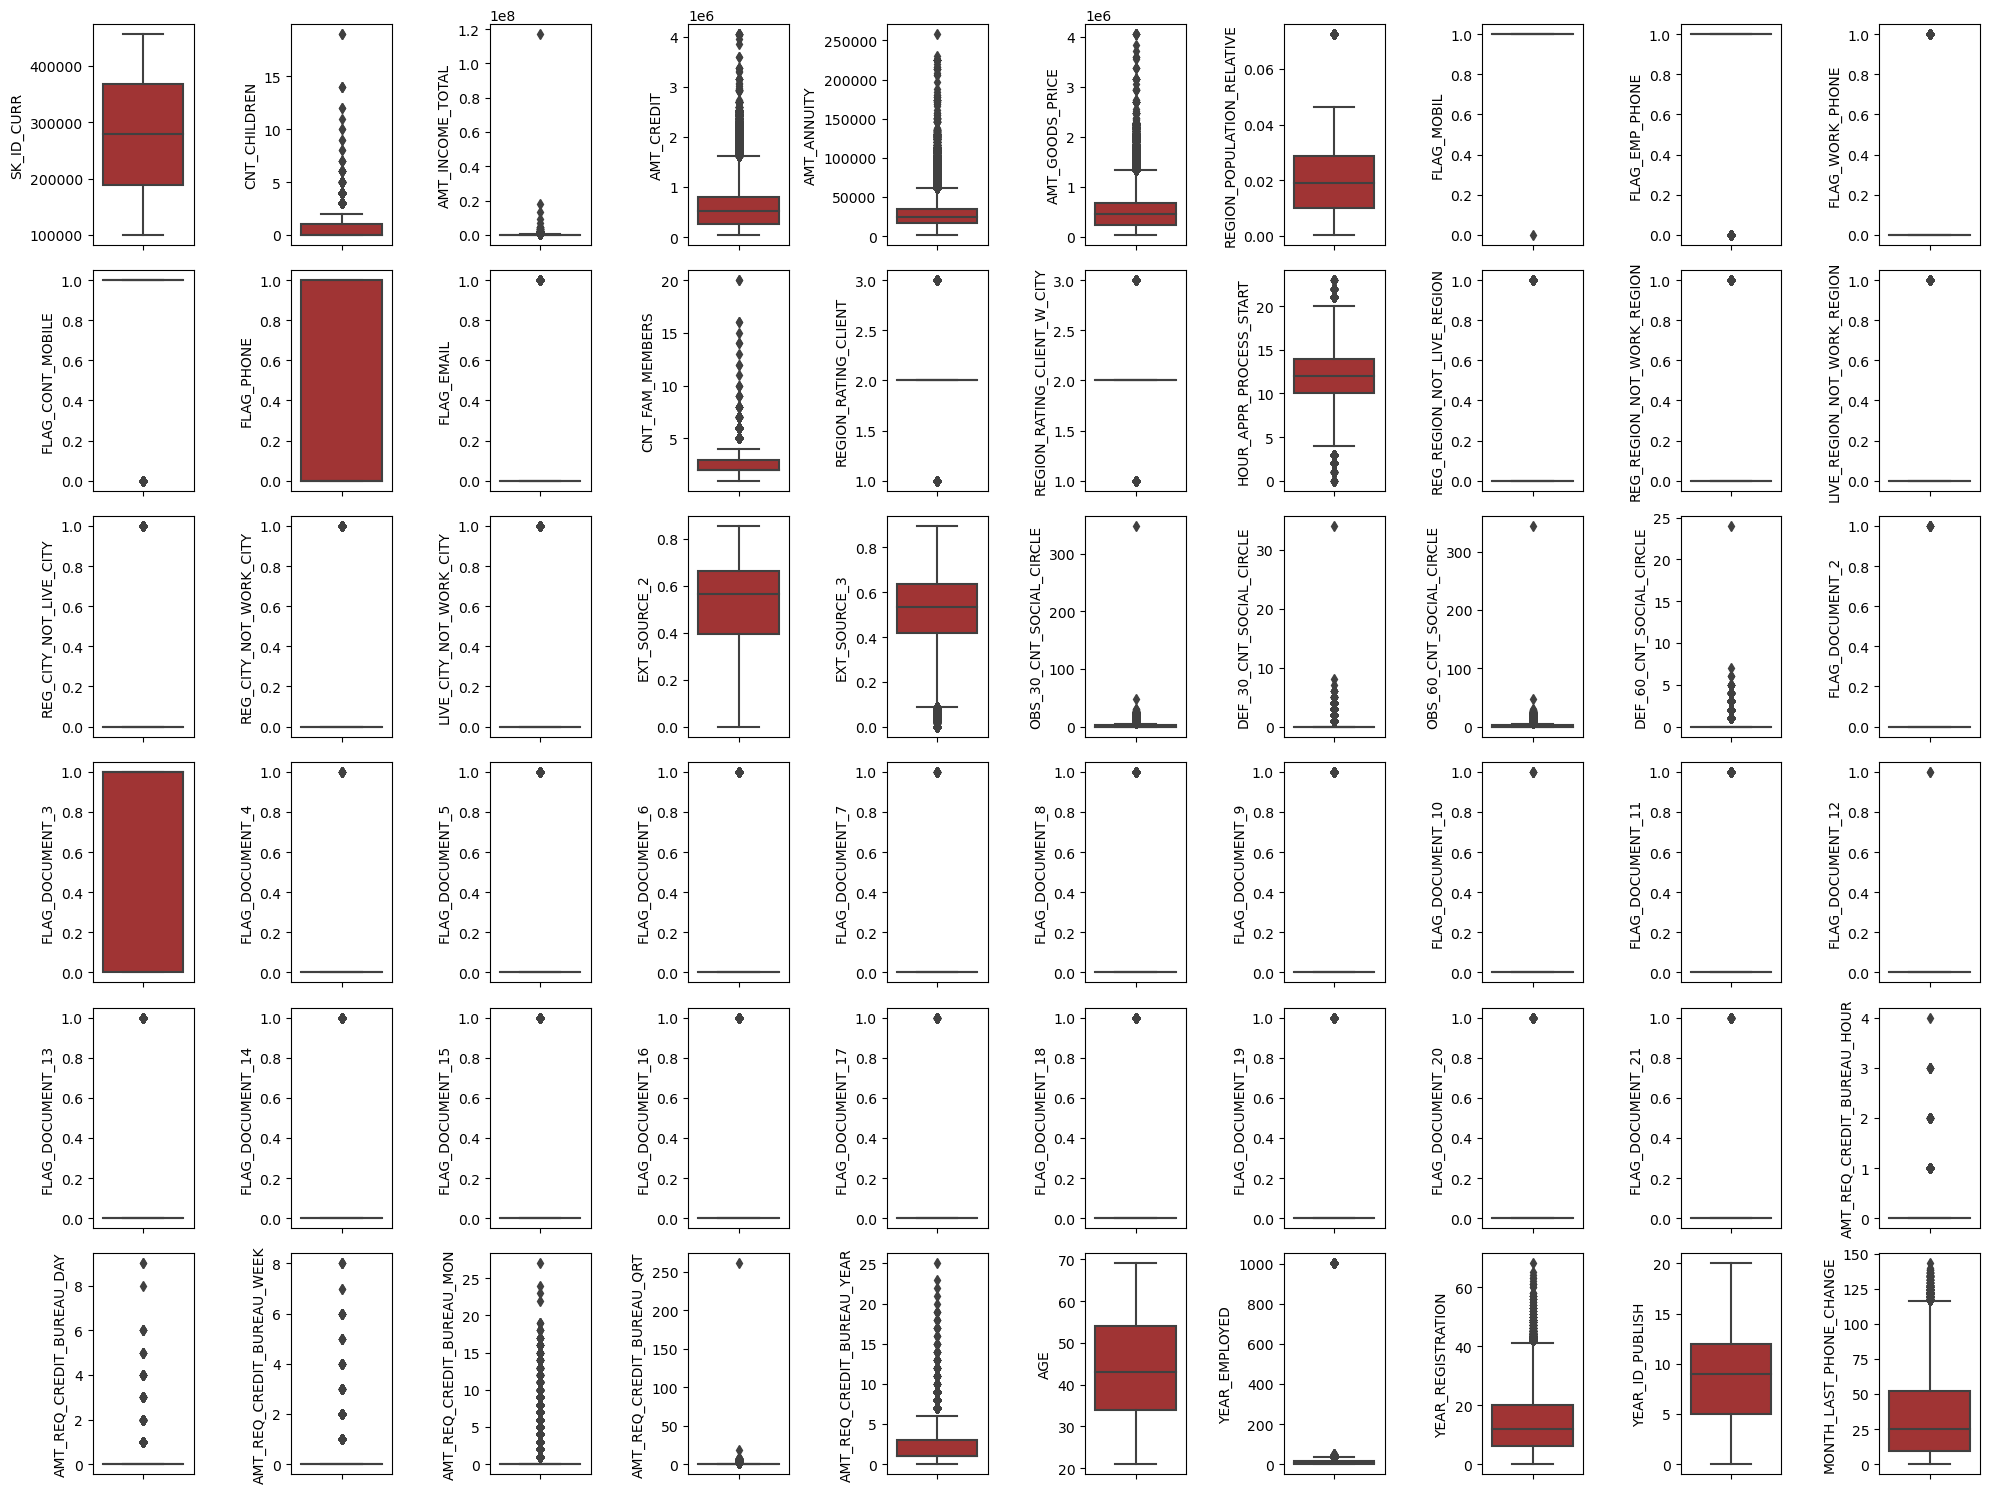

In [26]:
num = df.loc[:, (df.dtypes != 'object')].columns.tolist()
num.remove('TARGET') 

plt.figure(figsize=(20, 15))
for i in range(0, len(num)):
    plt.subplot(6, 10, i+1)
    sns.boxplot(df, y=df[num[i]], orient='v', color='firebrick')
    plt.tight_layout()

In [27]:
df.drop(df[df['CNT_CHILDREN'] > 15].index, inplace=True)
df.drop(df[df['AMT_INCOME_TOTAL'] > 20000000].index, inplace=True)
df.drop(df[df['REGION_POPULATION_RELATIVE'] > 0.05].index, inplace=True)
df.drop(df[df['OBS_30_CNT_SOCIAL_CIRCLE'] > 30].index, inplace=True)
df.drop(df[df['DEF_30_CNT_SOCIAL_CIRCLE'] > 10].index, inplace=True)
df.drop(df[df['OBS_60_CNT_SOCIAL_CIRCLE'] > 30].index, inplace=True)
df.drop(df[df['DEF_60_CNT_SOCIAL_CIRCLE'] > 10].index, inplace=True)
df.drop(df[df['AMT_REQ_CREDIT_BUREAU_QRT'] > 10].index, inplace=True)
df.drop(df[df['YEAR_EMPLOYED'] > 1000].index, inplace=True)

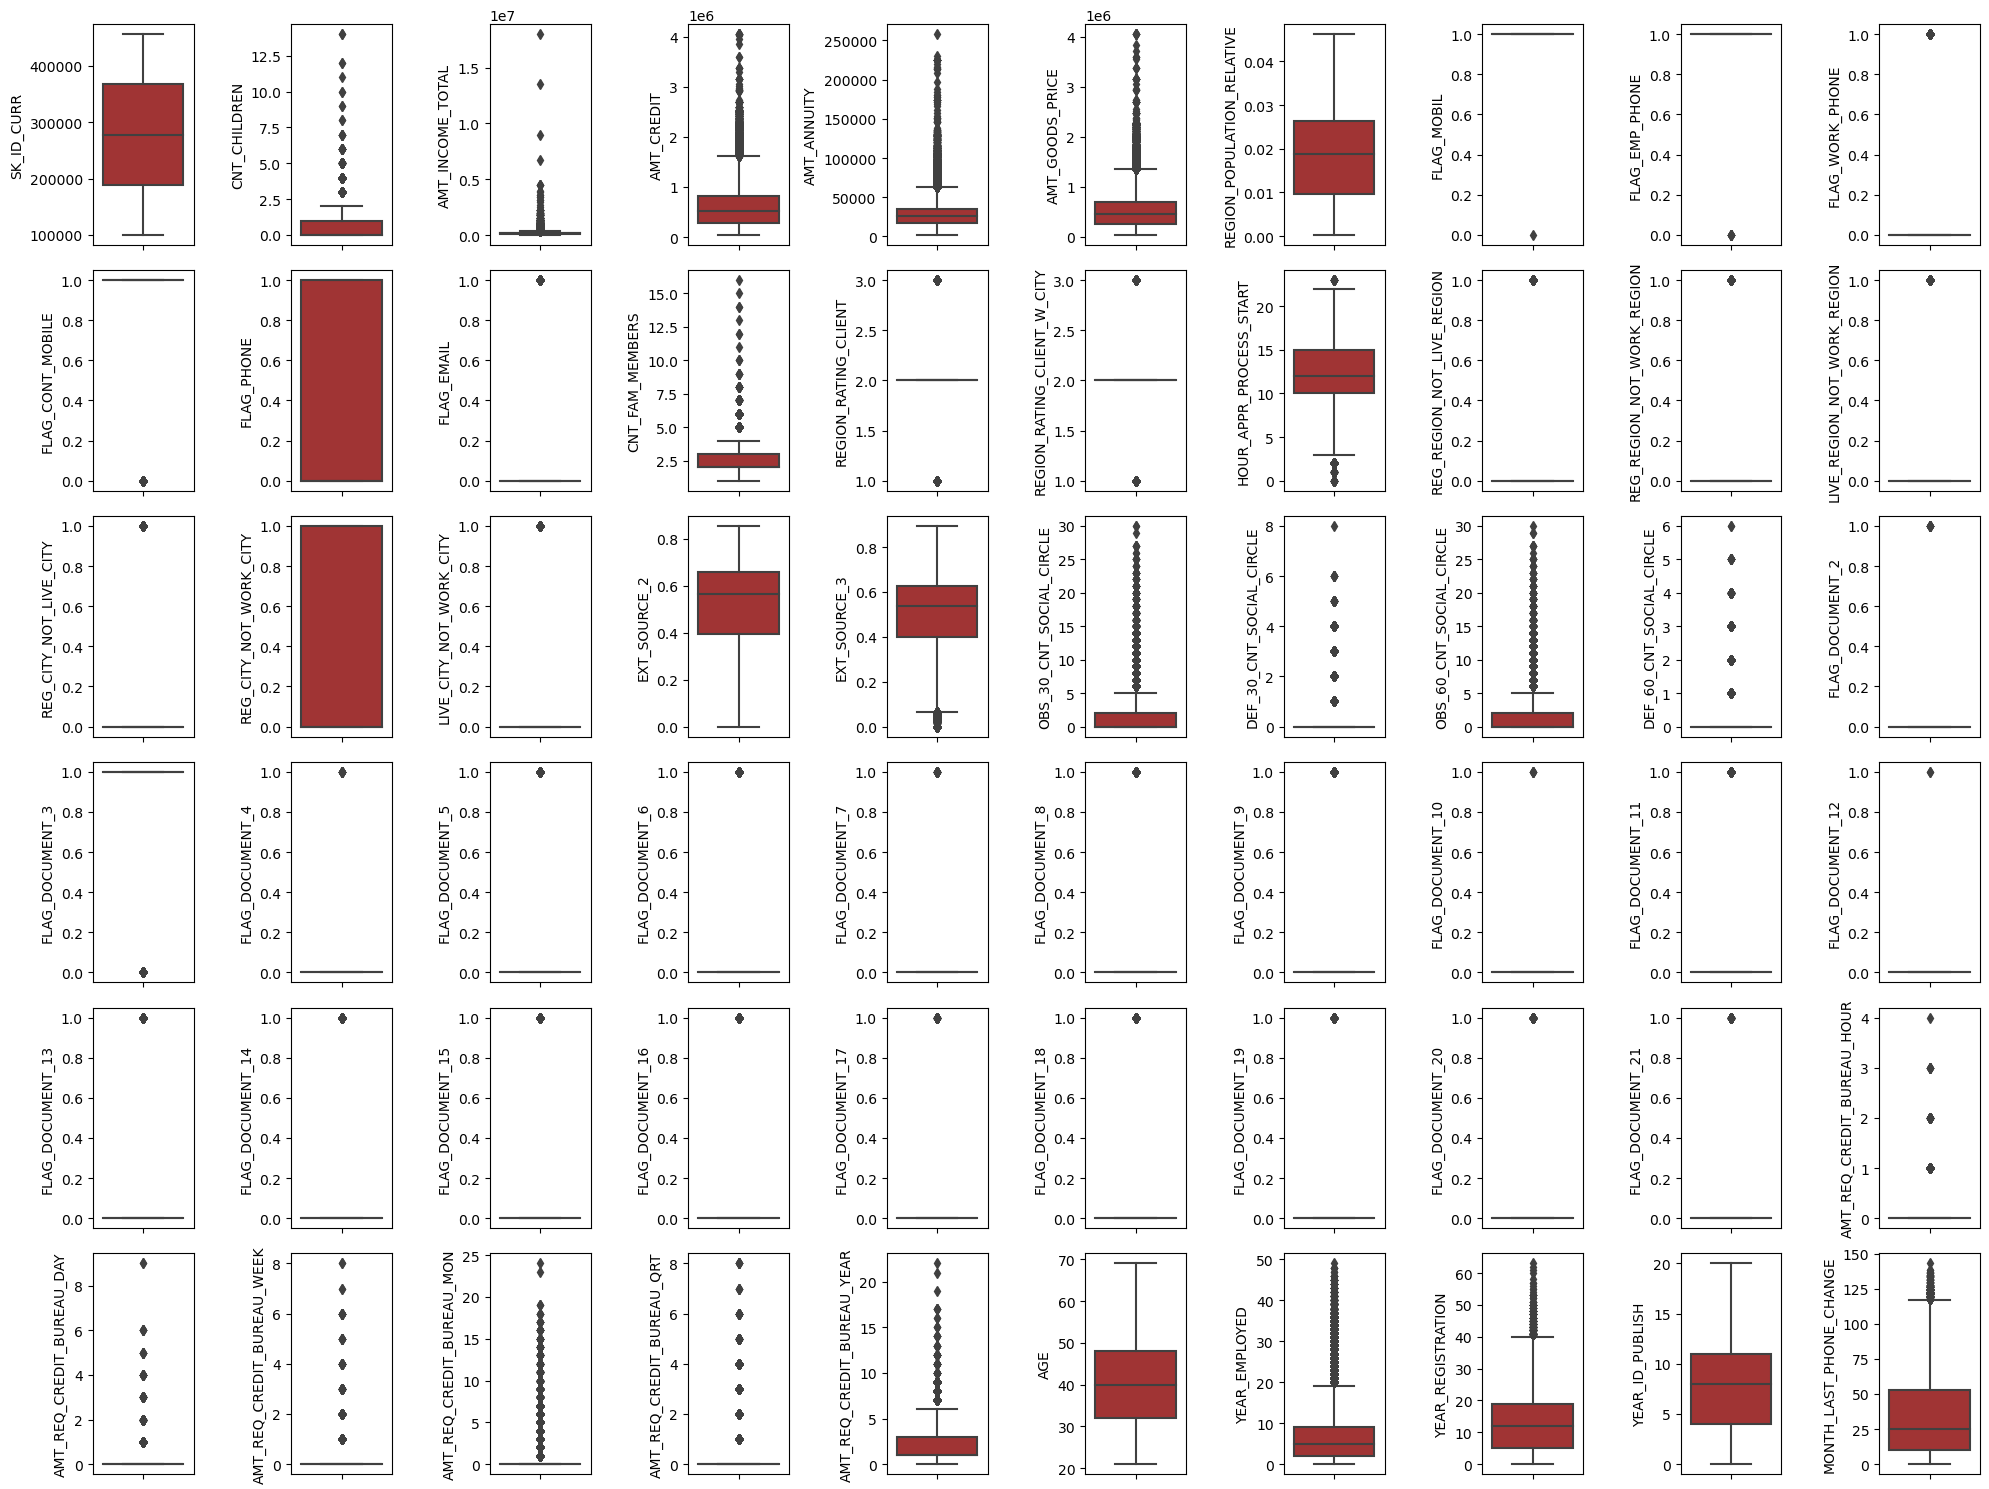

In [28]:
plt.figure(figsize=(20, 15))
for i in range(0, len(num)):
    plt.subplot(6, 10, i+1)
    sns.boxplot(df, y=df[num[i]], orient='v', color='firebrick')
    plt.tight_layout()

<br>
<br>

# **Data Exploration**

### Univariate Analysis
---

#### **Fitur Kategorikal**

Melihat distribusi kolom target.

In [29]:
df_exp = df.copy()

In [30]:
df_exp['TARGET'].value_counts()

0    223831
1     21560
Name: TARGET, dtype: int64

Dapat diinterpretasikan :
- 0 adalah klien yang **tidak memiliki** kesulitan pembayaran credit.
- 1 adalah klien yang **memiliki** kesulitan pembayaran credit.

In [31]:
target_map = {
    0: 'Good', 
    1: 'Default'
}

df_exp['TARGET'] = df_exp['TARGET'].map(target_map)

In [32]:
df_exp['TARGET'].value_counts()

Good       223831
Default     21560
Name: TARGET, dtype: int64

<br>
Rasio klien 'No Payment Difficulties' dengan 'Payment Difficulties' dalam dataset.

Text(0.5, 1.0, 'Percentages of\nCredit Good and Default\n')

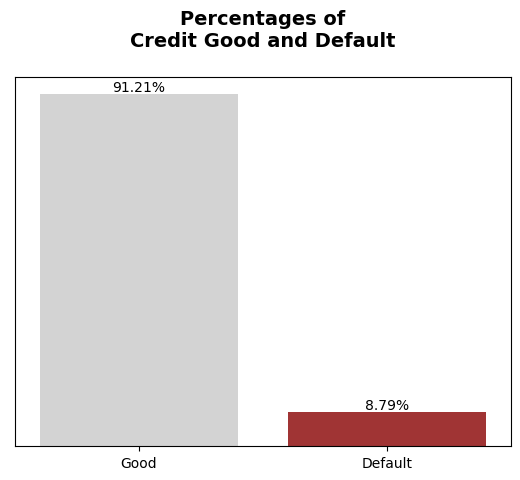

In [33]:
counts = df_exp['TARGET'].value_counts()
percentages = counts / counts.sum() * 100
ax = sns.barplot(x=counts.index, y=percentages, palette=['lightgrey','firebrick'])
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
ax.set_yticks([])
plt.ylabel('')
plt.title('Percentages of\nCredit Good and Default\n', fontsize=14, fontweight = 'bold')

8% dari keseluruhan klien mengalami kesulitan dalam pembayaran credit. 

#### **Fitur Numerikal**

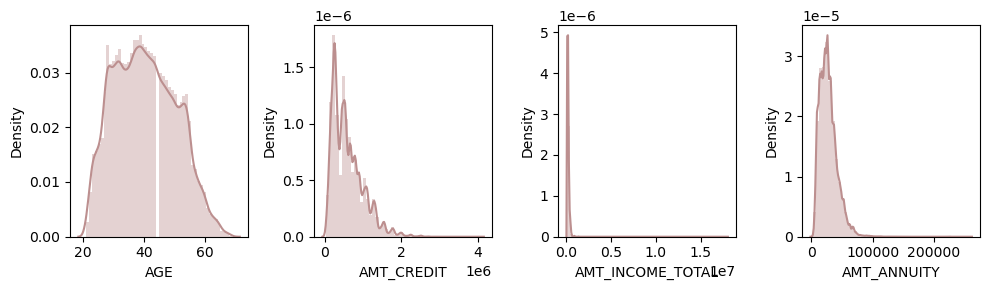

In [34]:
feats = ['AGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']

plt.figure(figsize=(10, 3))
for i in range(0, len(feats)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df_exp[feats[i]], color='rosybrown')
    plt.tight_layout()

- Fitur `AGE` memiliki distribusi data yang cenderung normal dengan rentang usia klien antara 20 - 70 tahun
- Fitur `AMT_CREDIT`, `AMT_INCOME_TOTAL`, `AMT_ANNUITY` memilki distribusi data cenderung positively skewed
<br>
<br>


### Bivariate Analysis
---

#### **Fitur Kategorikal**

In [35]:
# mengkalkulasi rasio dan pivoting
def ratio_with_target(feats):
    ratio_df = df_exp.groupby([feats,'TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
    ratio_df['percentage'] = ratio_df.groupby(feats).apply(lambda x: round(x.SK_ID_CURR/x.SK_ID_CURR.sum() *100, 0)).values.astype(int)
    ratio_df = ratio_df.pivot_table(index=feats, columns='TARGET', values='percentage')
    ratio_df = ratio_df.sort_values(by=['Default'], ascending=False)
    return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualisasi
def plotting(fitur, judul):
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    
    # count
    ax[0].set_title(f'Number of Payment Abilities by {judul}\n', fontsize=16, fontweight = 'bold')
    sns.countplot(x=fitur, data = df_exp, hue = 'TARGET', palette = ['firebrick', 'lightgrey'] , ax=ax[0])
    ax[0].bar_label(ax[0].containers[0], fontsize=12) 
    ax[0].bar_label(ax[0].containers[1], fontsize=12)
    ax[0].set_yticks([])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    
    #percentage
    ax[1].set_title(f'Percentage of Payment Abilities by {judul}\n', fontsize=16, fontweight = 'bold')
    ratio_with_target(fitur).plot(kind='barh', stacked=True, color = ['firebrick', 'lightgrey'], ax=ax[1])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                        ha='center', va='center', fontsize=12)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

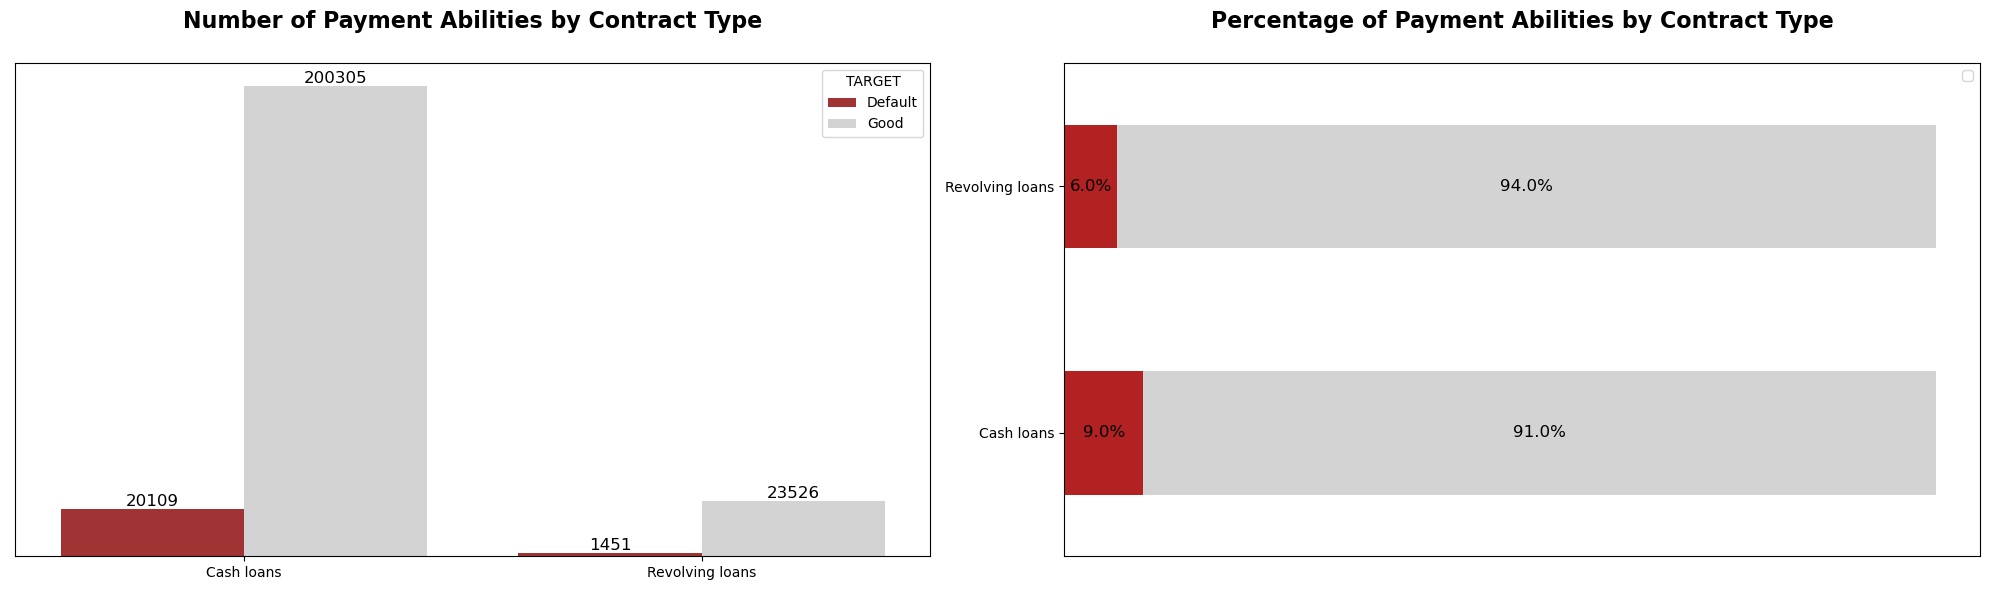

In [36]:
plotting('NAME_CONTRACT_TYPE', 'Contract Type')

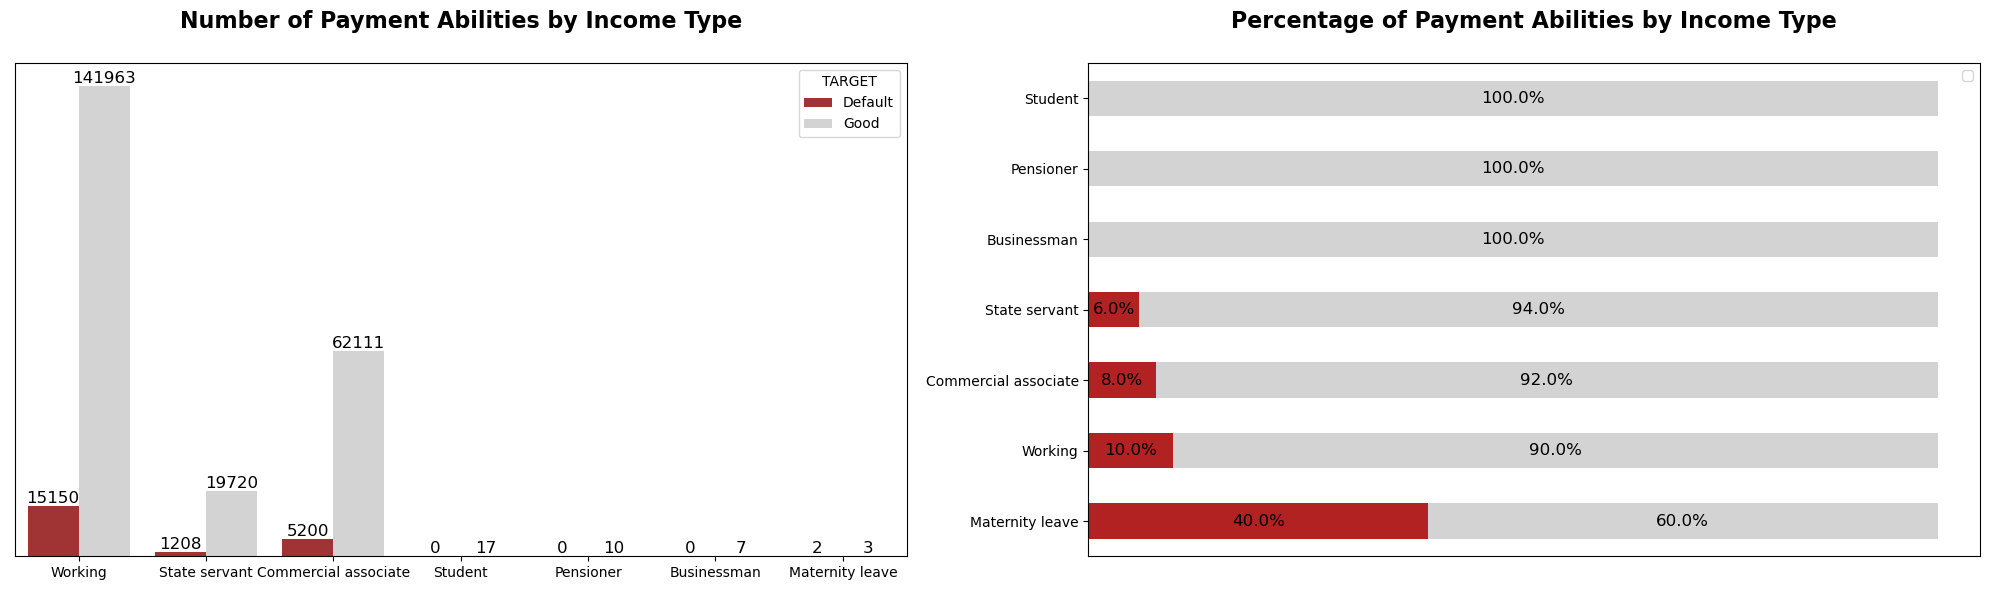

In [37]:
plotting('NAME_INCOME_TYPE', 'Income Type')

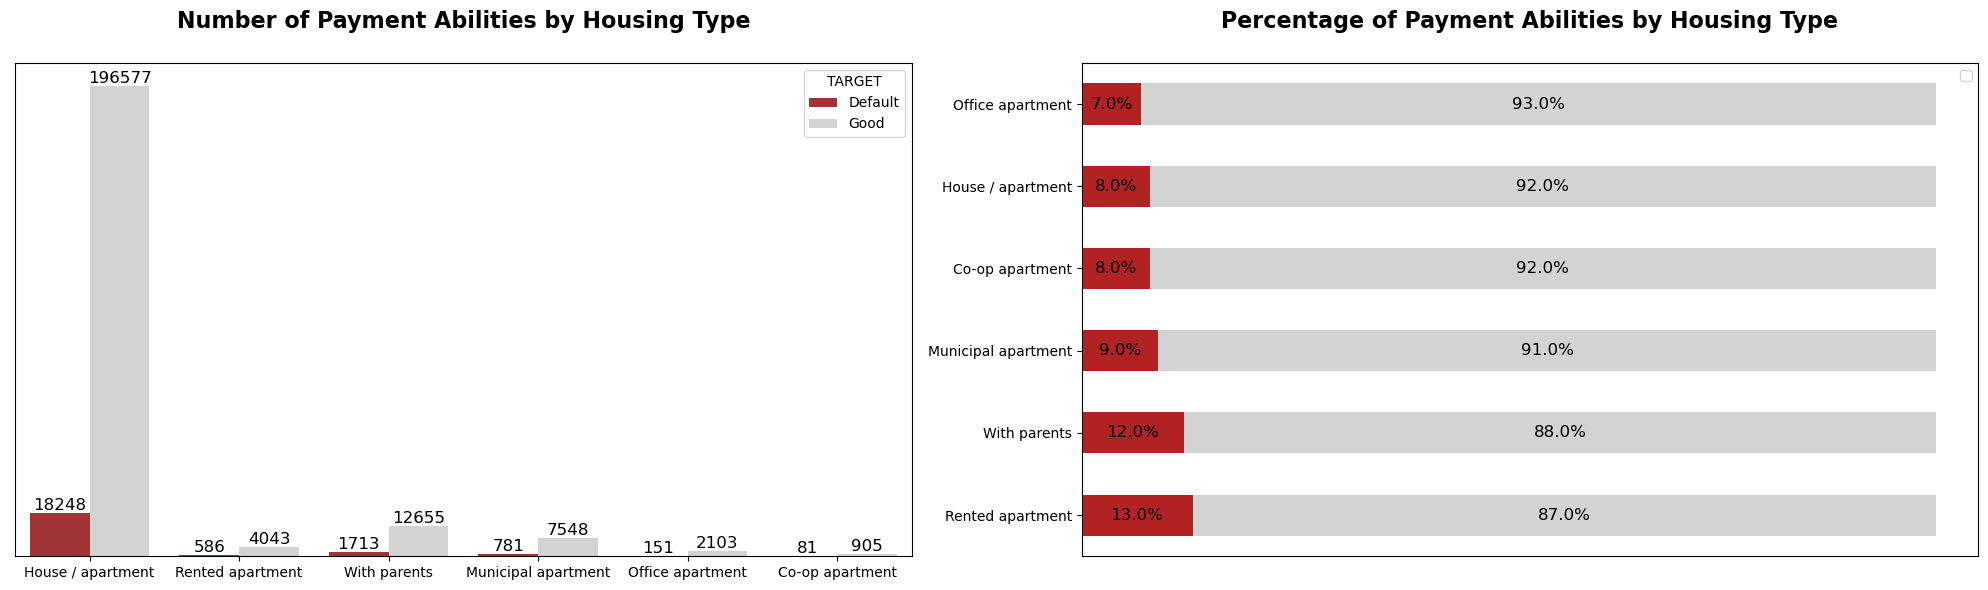

In [38]:
plotting('NAME_HOUSING_TYPE', 'Housing Type')

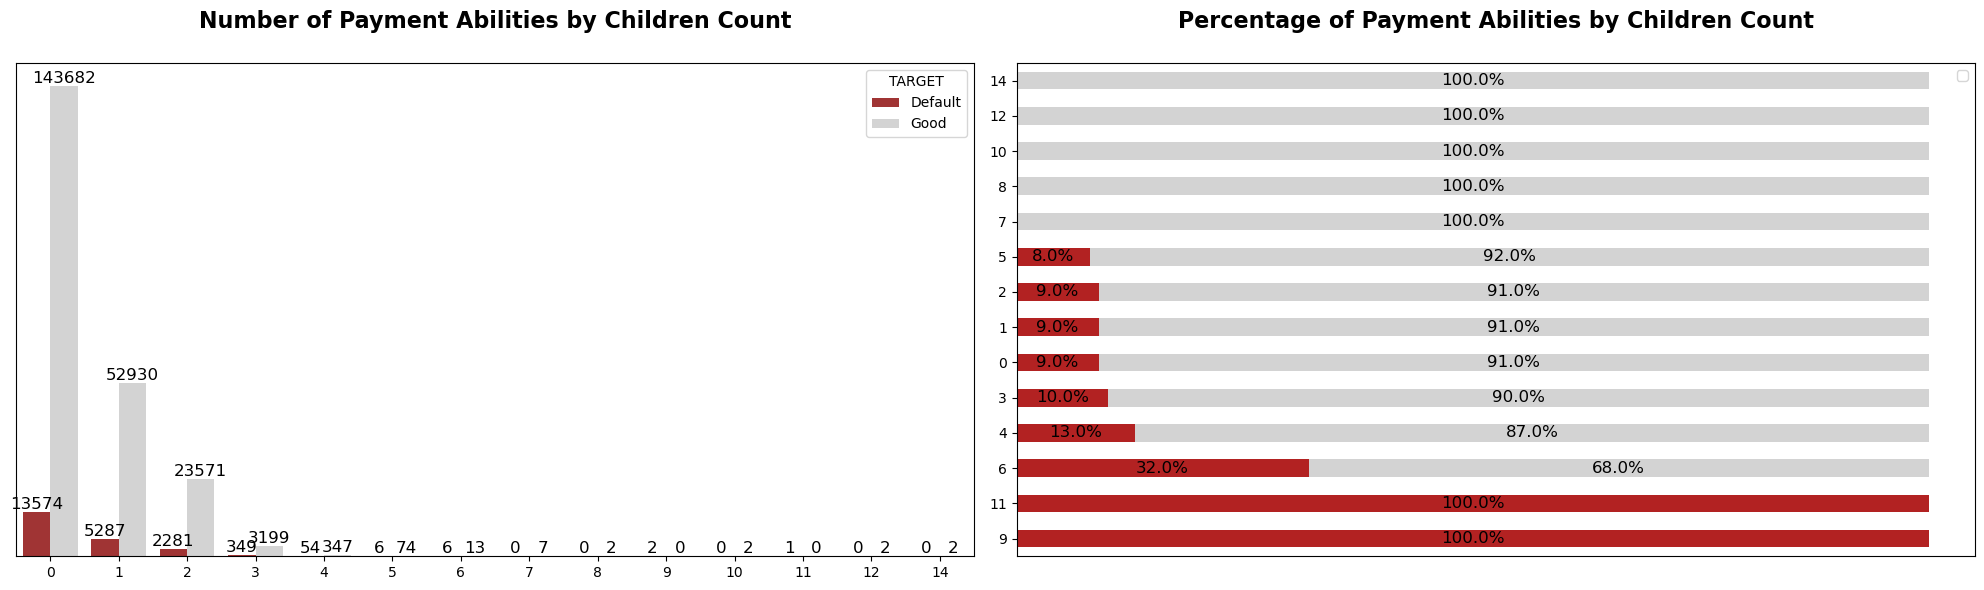

In [39]:
plotting('CNT_CHILDREN', 'Children Count')

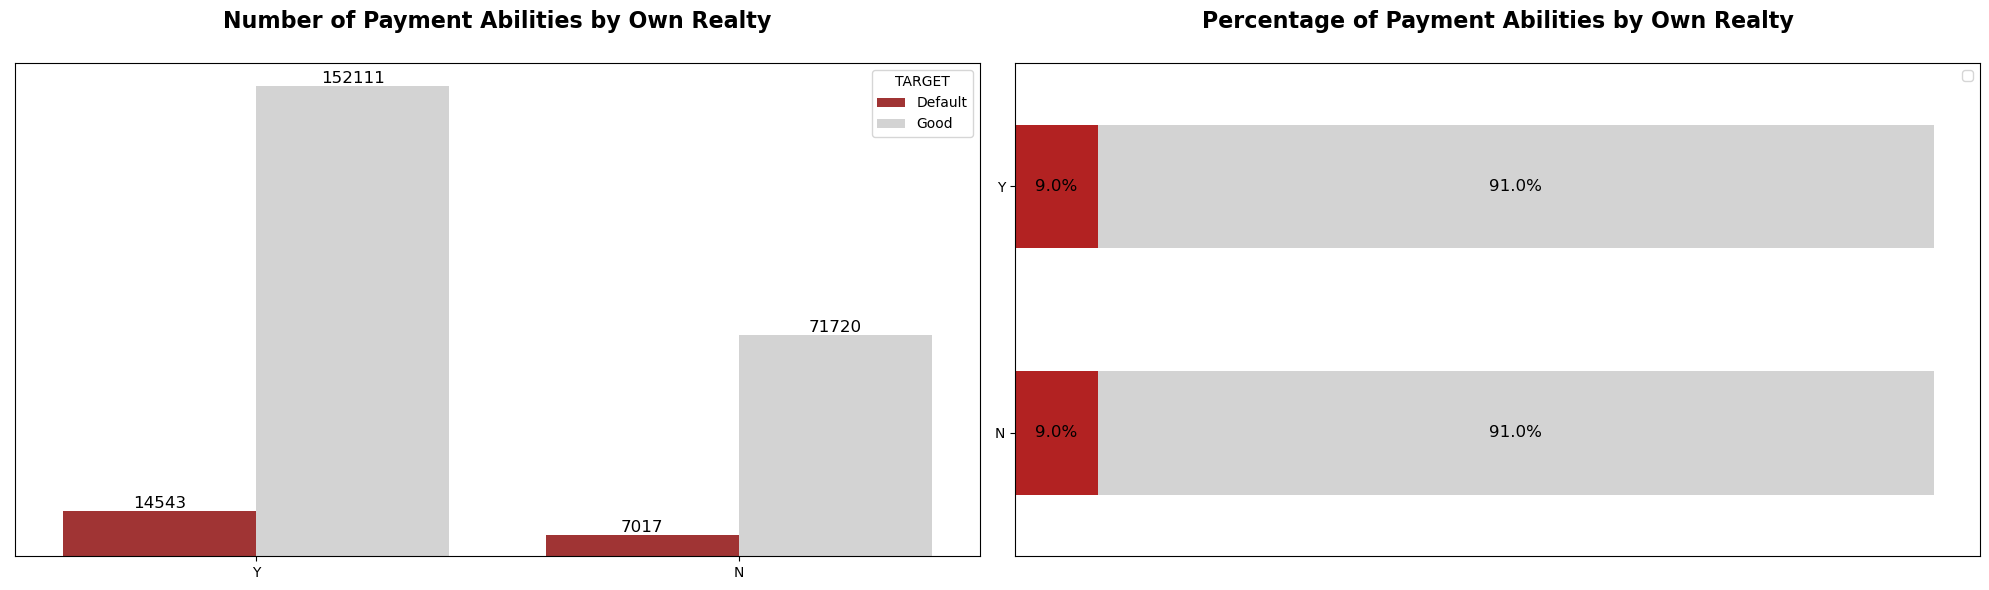

In [40]:
plotting('FLAG_OWN_REALTY', 'Own Realty')

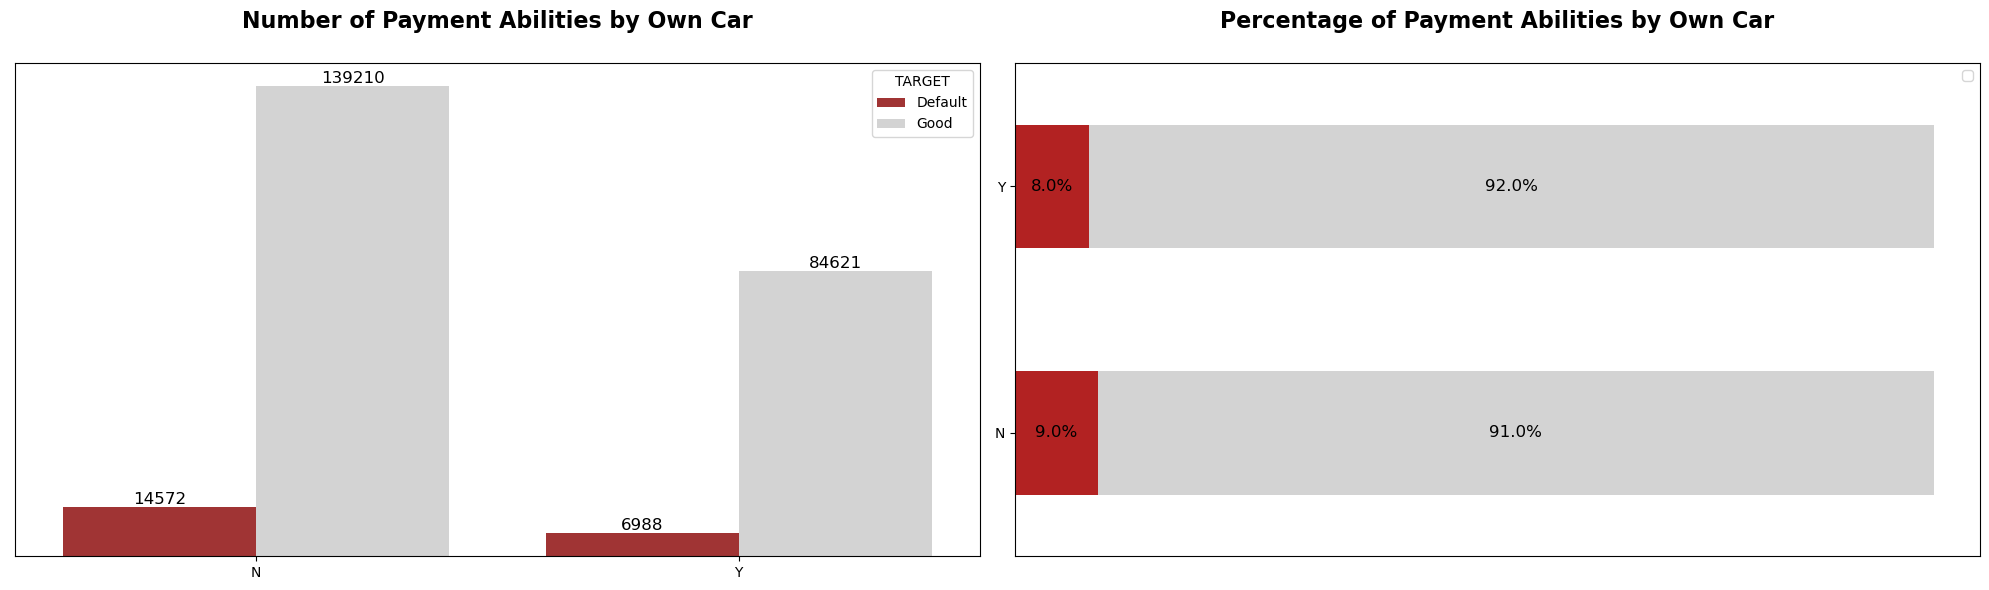

In [41]:
plotting('FLAG_OWN_CAR', 'Own Car')

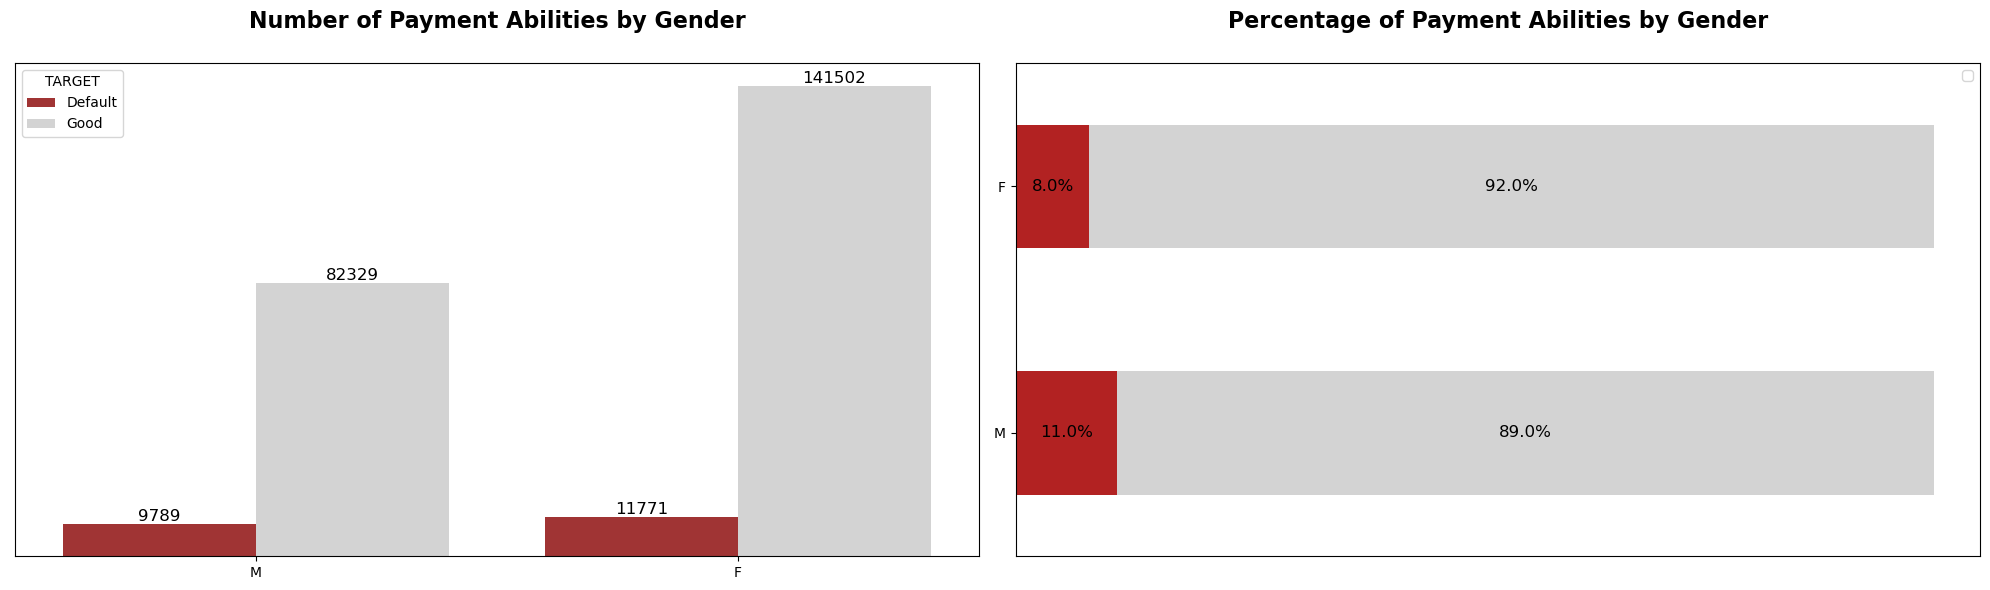

In [42]:
plotting('CODE_GENDER', 'Gender')

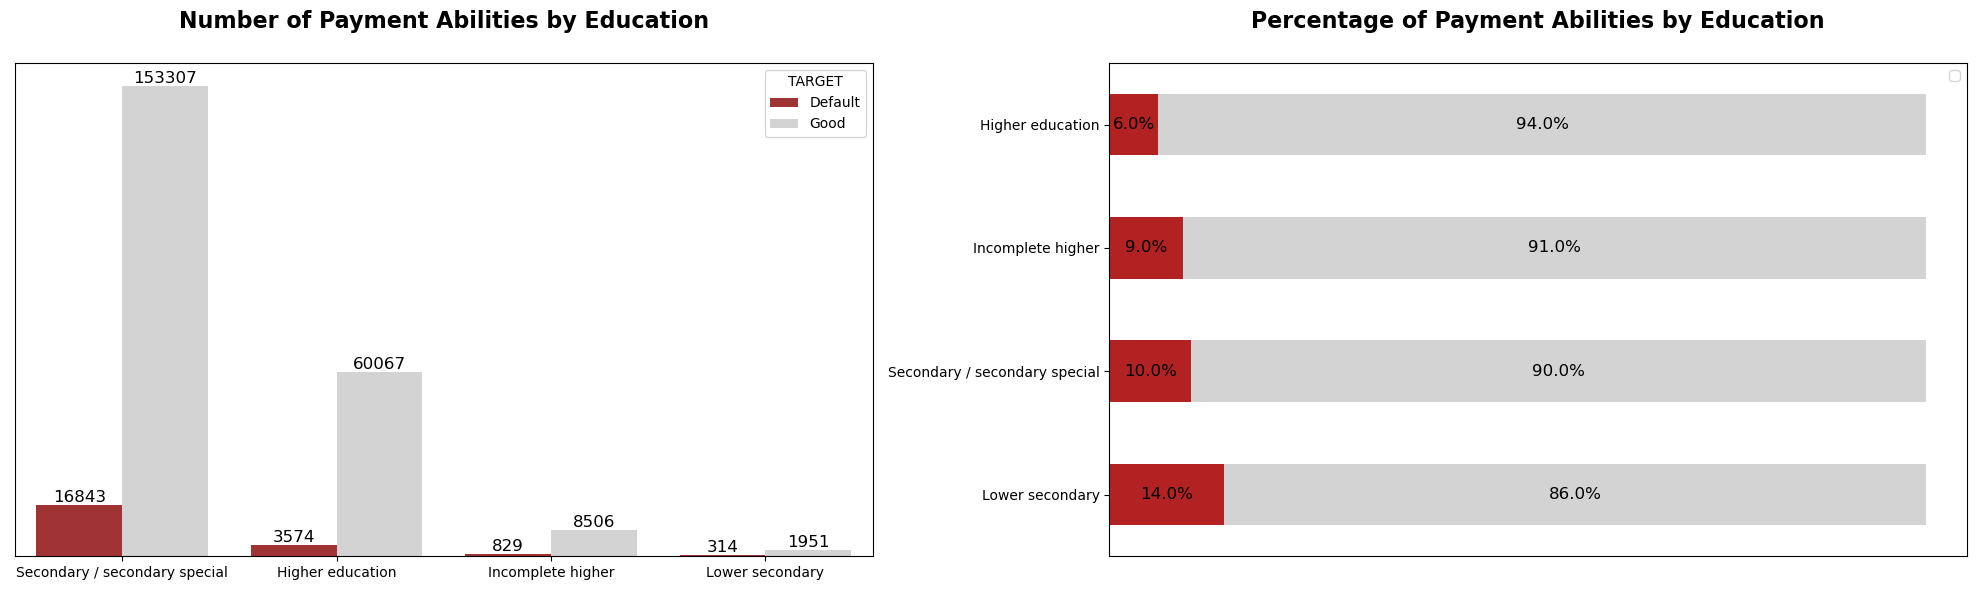

In [43]:
plotting('NAME_EDUCATION_TYPE', 'Education')

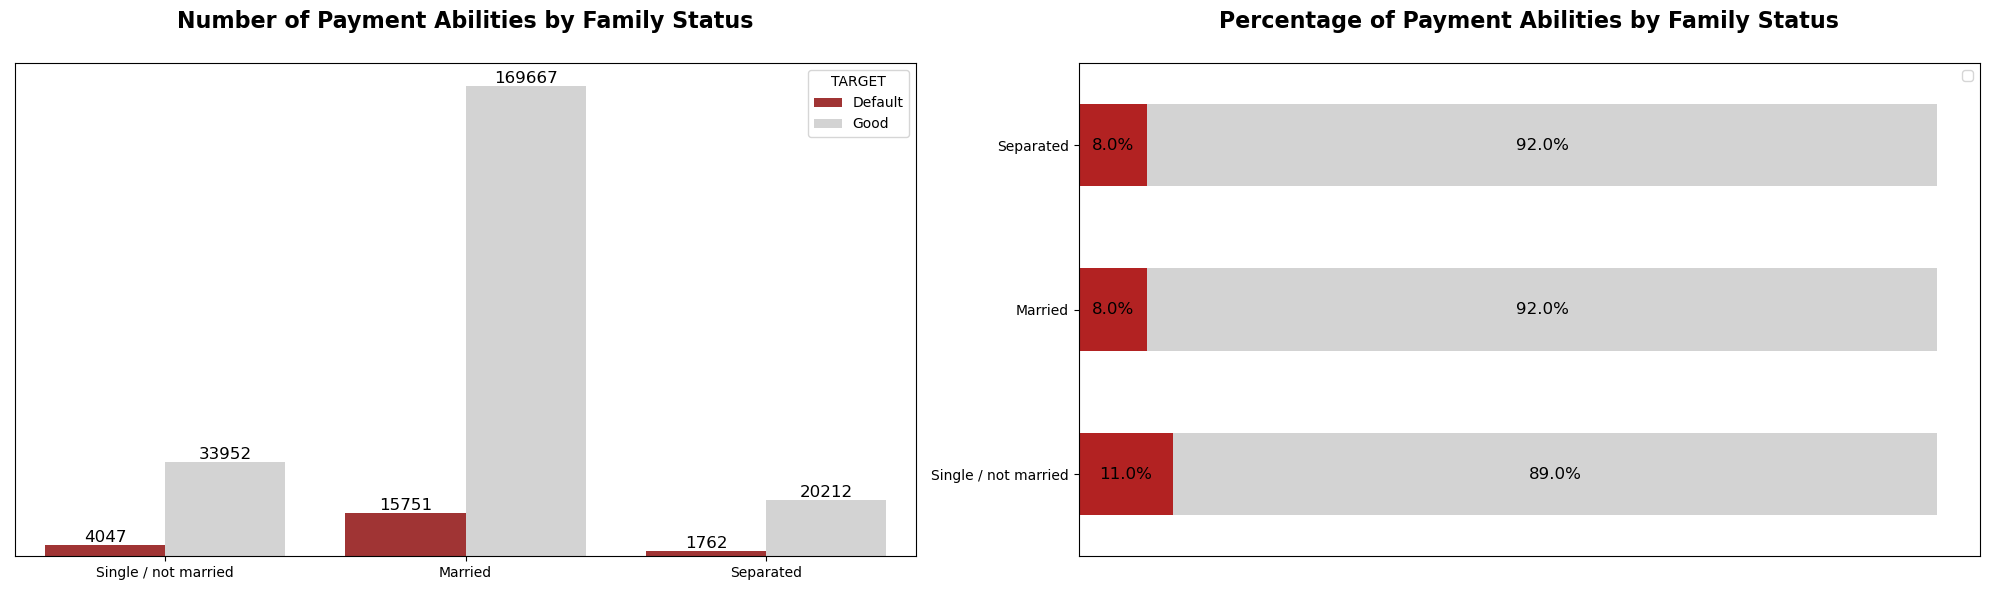

In [44]:
plotting('NAME_FAMILY_STATUS', 'Family Status')

#### **Fitur Numerikal**

In [45]:
def num_plotting(fitur, judul, df=df) :
    fig, ax = plt.subplots(1,3, figsize=(15,5))

    # KDE plot
    sns.kdeplot(data=df_exp, x=fitur, hue='TARGET', ax=ax[0], shade=True, alpha=.7, palette = ['firebrick', 'lightgrey'])

    # Violin plot
    sns.violinplot(x='TARGET', y=fitur, data=df_exp, ax=ax[1], inner='quartile', palette = ['firebrick', 'lightgrey'])
    ax[1].set_title(f'{judul}\n', fontsize=14, fontweight = 'bold')
    ax[1].set_xlabel('')

    # Box plot
    sns.boxplot(x='TARGET', y=fitur, data=df_exp, ax=ax[2], palette = ['firebrick', 'lightgrey'])
    ax[2].set_xlabel('')
    ax[2].set_ylabel('')
    
    # Show
    plt.tight_layout()
    plt.show()

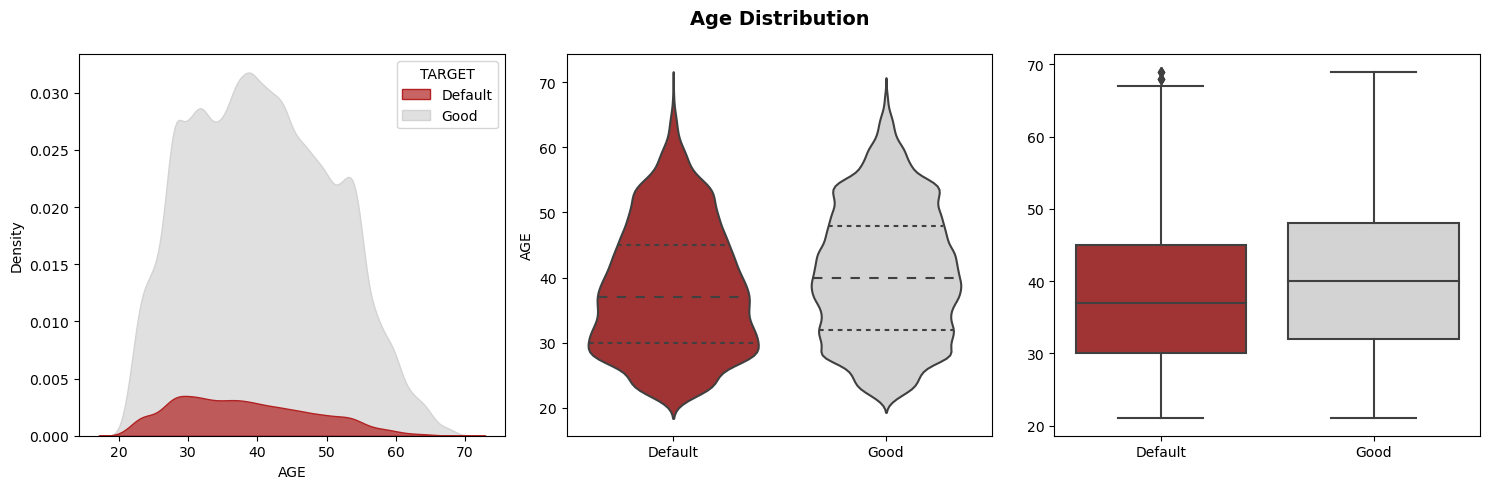

In [46]:
num_plotting('AGE', 'Age Distribution')

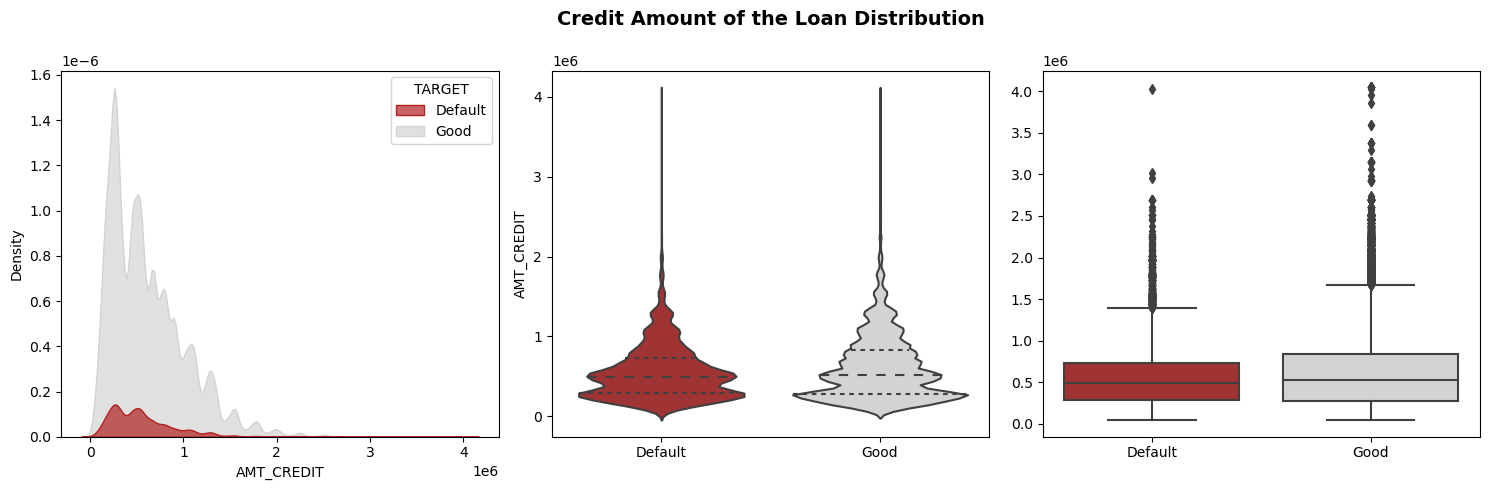

In [47]:
num_plotting('AMT_CREDIT', 'Credit Amount of the Loan Distribution')

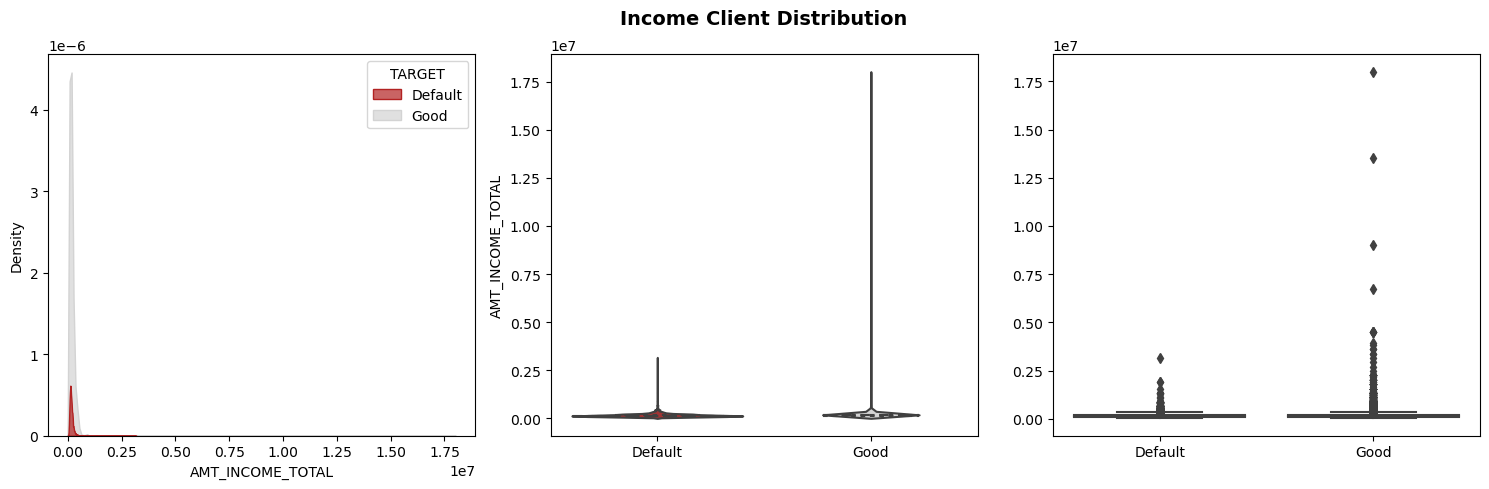

In [48]:
num_plotting('AMT_INCOME_TOTAL', 'Income Client Distribution')

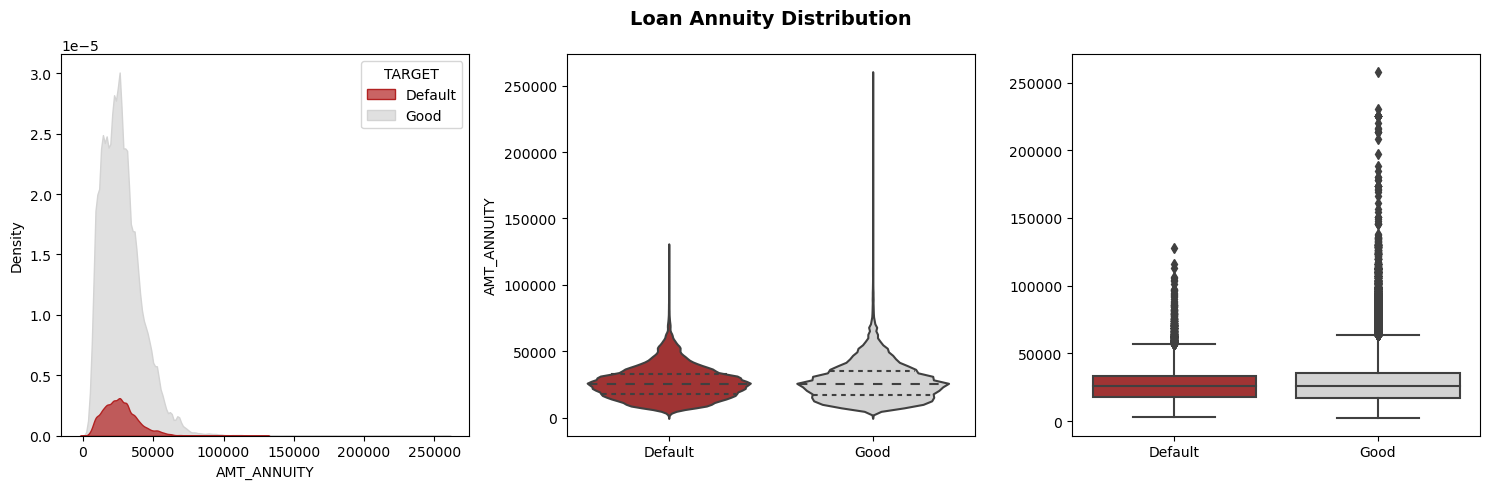

In [49]:
num_plotting('AMT_ANNUITY', 'Loan Annuity Distribution')

# **Data Pre-Processing**

## **Feature Selection**

### Multicollinearity Feature
---

In [50]:
df_pros = df_exp.copy()

In [51]:
df_cor = df_pros.drop(columns=['SK_ID_CURR'])
corr_matrix = df_cor.corr(method='spearman')
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]

for feature in to_drop:
    corr_value = corr_matrix[feature][corr_matrix[feature] >= 0.8]
    print(f"{feature}: {list(corr_value.index)} (Correlation Values: {list(corr_value)})")

AMT_ANNUITY: ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'] (Correlation Values: [0.8253055618311701, 1.0, 0.8214045639877227])
AMT_GOODS_PRICE: ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'] (Correlation Values: [0.9836915345823587, 0.8214045639877227, 1.0])
CNT_FAM_MEMBERS: ['CNT_CHILDREN', 'CNT_FAM_MEMBERS'] (Correlation Values: [0.8491464997595434, 1.0])
REGION_RATING_CLIENT_W_CITY: ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'] (Correlation Values: [0.9432565432098665, 1.0])
LIVE_REGION_NOT_WORK_REGION: ['REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'] (Correlation Values: [0.8642401654558933, 1.0])
LIVE_CITY_NOT_WORK_CITY: ['REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'] (Correlation Values: [0.8151942587867256, 1.0])
OBS_60_CNT_SOCIAL_CIRCLE: ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'] (Correlation Values: [0.9973134660083752, 1.0])
DEF_60_CNT_SOCIAL_CIRCLE: ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'] (Correlation Values: [

In [52]:
to_drop = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 
           'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

df_pros.drop(columns=to_drop, inplace=True)

### Chi-Square for Categorical Features
---


In [53]:
df_chi = df_pros.copy()

In [54]:
import pandas as pd
from scipy.stats import chi2_contingency

# list kategori
cats = df_chi.loc[:, (df_chi.dtypes == 'object')].columns.tolist()
df_chi1 = df_chi[cats]

# Inisialisasi list untuk menyimpan hasil analisis
features = []
scores = []
p_values = []

# Loop melalui setiap fitur kategorikal dalam DataFrame
for feature in df_chi1.columns[:-1]:  # Exclude the 'Target' column
    # Buat tabel kontingensi dari DataFrame
    contingency_table = pd.crosstab(df_chi1[feature], df_chi1['TARGET'])

    # Lakukan uji chi-square
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Tambahkan hasil ke list
    features.append(feature)
    scores.append(chi2)
    p_values.append(p)

# Buat DataFrame hasil analisis
result_df = pd.DataFrame({
    'Feature': features,
    'Chi-Square Score': scores,
    'P-Value': p_values
})

result_df.sort_values(by='P-Value')


,Feature,Chi-Square Score,P-Value
0,TARGET,245378.522064,0.000000e+00
7,NAME_EDUCATION_TYPE,1133.989740,1.537743e-245
2,CODE_GENDER,623.092907,1.588780e-137
6,NAME_INCOME_TYPE,484.943710,1.471249e-101
1,NAME_CONTRACT_TYPE,307.025500,9.709782e-69
9,NAME_HOUSING_TYPE,302.089498,3.559811e-63
3,FLAG_OWN_CAR,244.330250,4.472517e-55
8,NAME_FAMILY_STATUS,200.554415,2.819436e-44
5,NAME_TYPE_SUITE,54.230573,2.117394e-09
10,WEEKDAY_APPR_PROCESS_START,17.445856,7.777043e-03


### ANOVA for Numerical Features
---

In [55]:
df_anv = df_pros.copy() 

In [56]:
df_anv['TARGET'] = df_anv['TARGET'].map({'Good': 0, 'Default': 1})

In [57]:
from scipy.stats import f_oneway

# membuat list fitur
num = df_anv.loc[:, (df_anv.dtypes != 'object')].columns.tolist()
df_n = df_anv[num]

# ----------------------------------------------------------
# split fitur dan target
X = df_n.drop(columns=['TARGET']).copy() 
y = df_n['TARGET'].copy() 

# Uji ANOVA untuk setiap fitur
anova_results = []
for feature in X.columns:
    groups = []
    for target_class in y.unique():
        groups.append(X[feature][y == target_class])
    f_statistic, p_value = f_oneway(*groups)
    anova_results.append((feature, f_statistic, p_value))

# Membuat dataframe hasil uji ANOVA
anova_df = pd.DataFrame(anova_results, columns=['Feature', 'F-Statistic', 'P-Value'])

# Menampilkan hanya fitur dengan p-value signifikan (misalnya < 0.05)
significant_features = anova_df[anova_df['P-Value'] < 0.05]

significant_features.sort_values(by='P-Value')



,Feature,F-Statistic,P-Value
19,EXT_SOURCE_3,6256.542274,0.000000e+00
18,EXT_SOURCE_2,7209.045305,0.000000e+00
49,YEAR_EMPLOYED,1428.968907,8.486137e-312
48,AGE,1081.372867,1.214085e-236
52,MONTH_LAST_PHONE_CHANGE,914.037729,2.040612e-200
11,REGION_RATING_CLIENT,882.373225,1.472838e-193
17,REG_CITY_NOT_WORK_CITY,427.251967,7.763417e-95
16,REG_CITY_NOT_LIVE_CITY,424.049547,3.853619e-94
51,YEAR_ID_PUBLISH,400.909119,4.115506e-89
23,FLAG_DOCUMENT_3,366.104762,1.513171e-81


In [58]:
significant_features.sort_values(by='P-Value')['Feature'].unique()

array(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'YEAR_EMPLOYED', 'AGE',
       'MONTH_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'YEAR_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'AMT_CREDIT',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'YEAR_REGISTRATION',
       'REGION_POPULATION_RELATIVE', 'HOUR_APPR_PROCESS_START',
       'AMT_INCOME_TOTAL', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_8',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_6', 'CNT_CHILDREN', 'FLAG_DOCUMENT_15',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_11',
       'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_9',
       'FLAG_EMAIL'], dtype=object)

### Feature Selection
---

In [59]:
df_select = df_pros.copy()
df_select['TARGET'] = df_select['TARGET'].map({'Good': 0, 'Default': 1})

In [60]:
feats = ['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE',
        'EXT_SOURCE_3', 'EXT_SOURCE_2', 'YEAR_EMPLOYED', 'AGE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'YEAR_ID_PUBLISH', 
        'MONTH_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'DEF_30_CNT_SOCIAL_CIRCLE', 'YEAR_REGISTRATION','REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'TARGET']

In [61]:
df_selected = df_select[feats]

In [62]:
df_selected.sample(10).T

,65887,233112,114261,228536,142694,139427,288664,134373,33998,88519
NAME_EDUCATION_TYPE,Higher education,Secondary / secondary special,Higher education,Higher education,Incomplete higher,Secondary / secondary special,Incomplete higher,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
CODE_GENDER,M,F,F,M,F,F,F,F,M,F
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
EXT_SOURCE_3,0.567379,0.273565,0.535276,0.177704,0.850092,0.248536,0.535276,0.554947,0.612704,0.742182
EXT_SOURCE_2,0.664427,0.574038,0.445118,0.780943,0.145937,0.018526,0.563828,0.62063,0.116957,0.334286
YEAR_EMPLOYED,1.0,2.0,1.0,3.0,2.0,3.0,2.0,1.0,5.0,4.0
AGE,45.0,31.0,28.0,54.0,48.0,45.0,23.0,36.0,24.0,43.0
REGION_RATING_CLIENT,2,3,3,2,2,2,2,2,3,2
REG_CITY_NOT_WORK_CITY,0,0,1,0,0,1,1,0,0,0
REG_CITY_NOT_LIVE_CITY,0,0,0,0,0,1,1,0,0,0


### Correlation Heatmap
---

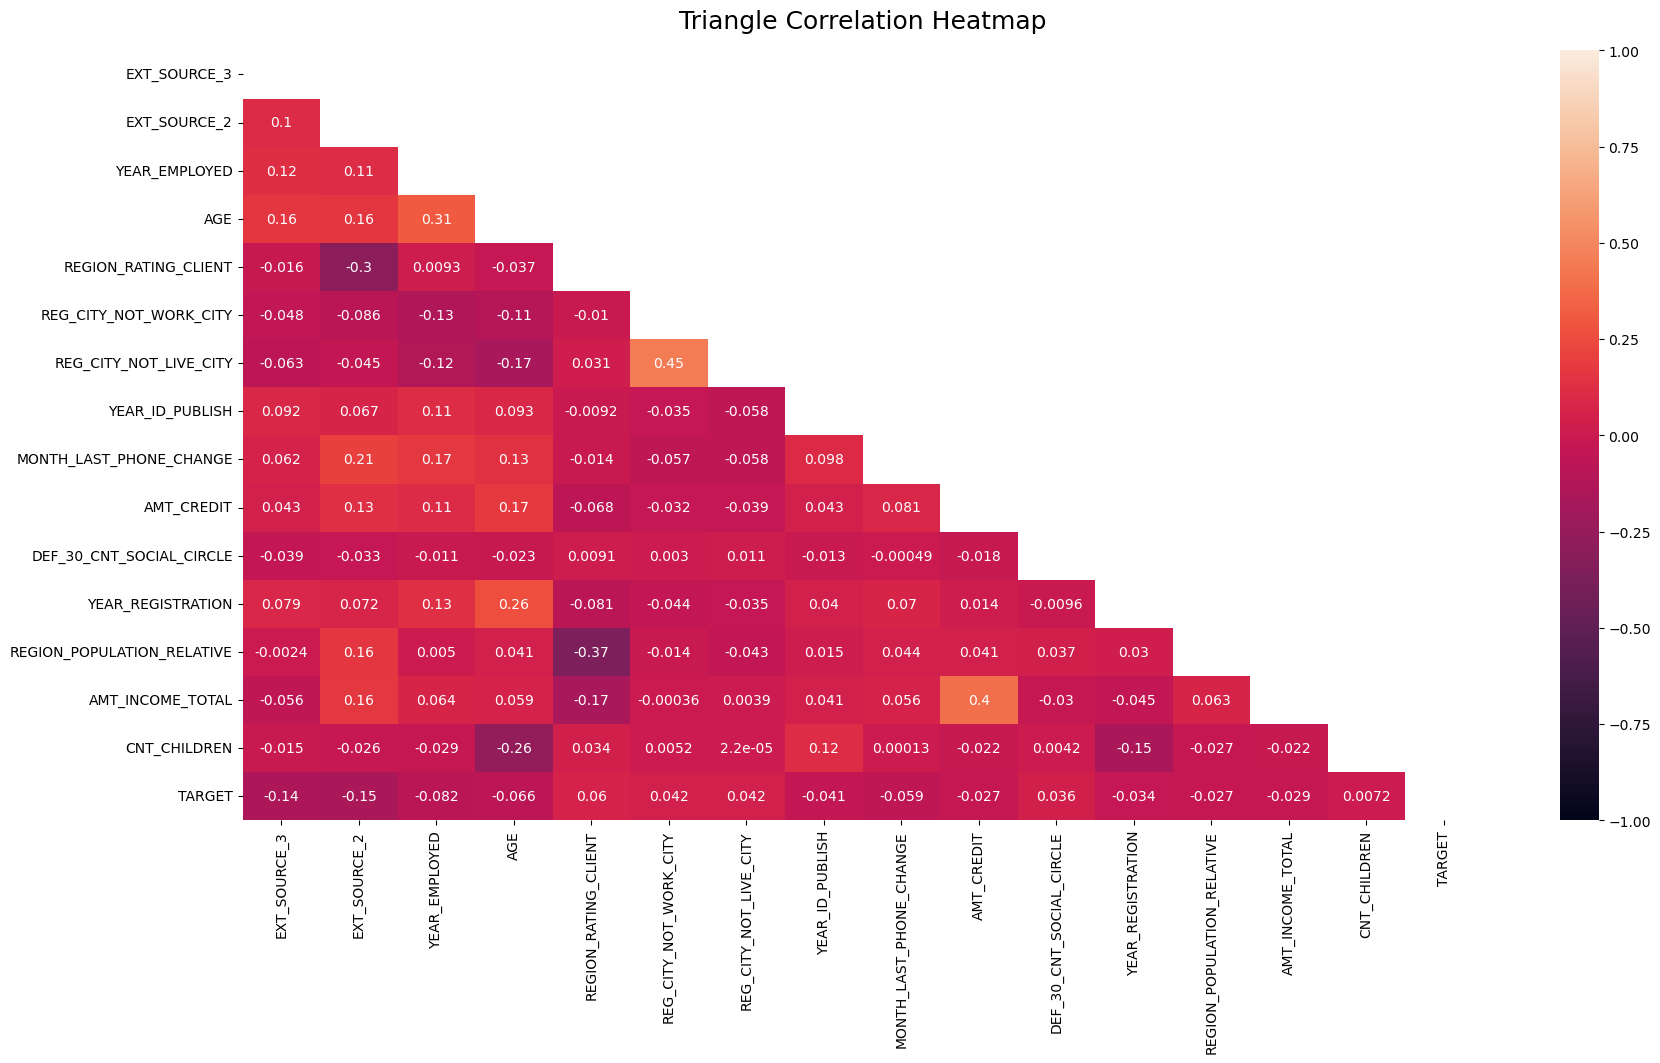

In [63]:
plt.figure(figsize=(20, 10))
corr_matrix = df_selected.corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix,dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='rocket')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## **Feature Encoding**

### Label Encoding
---

In [64]:
df_encod = df_selected.copy()

In [65]:
cat = df_encod.loc[:, (df_encod.dtypes == 'object')].columns.tolist()
cat

['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE']

In [66]:
# NAME_EDUCATION_TYPE
dict_edu = {
    'Lower secondary' : 0,
    'Secondary / secondary special' : 1,
    'Incomplete higher' : 2,
    'Higher education' : 3}
df_encod['NAME_EDUCATION_TYPE'] = df_encod['NAME_EDUCATION_TYPE'].map(dict_edu)


# --------------------------------------------------------------
# CODE_GENDER
dict_gender = {
    'F' : 0,
    'M' : 1}
df_encod['CODE_GENDER'] = df_encod['CODE_GENDER'].map(dict_gender)

# --------------------------------------------------------------
# # FLAG_OWN_CAR
# dict_owncar = {
#     'N' : 0,
#     'Y' : 1}
# df_encod['FLAG_OWN_CAR'] = df_encod['FLAG_OWN_CAR'].map(dict_owncar)

# --------------------------------------------------------------
# NAME_CONTRACT_TYPE
dict_c = {
    'Cash loans' : 0,
    'Revolving loans' : 1}
df_encod['NAME_CONTRACT_TYPE'] = df_encod['NAME_CONTRACT_TYPE'].map(dict_c)


### One Hot Encoding
---

In [67]:
# df_encod = pd.get_dummies(df_encod, columns=['NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS'])

In [68]:
# df_encod.sample(8).T

# **Modeling**

In [155]:
df_model = df_encod.copy()

### Split Data Train and Test
---

In [156]:
# mengelompokkan fitur dan target
X = df_model.drop(columns='TARGET').copy()
y = df_model['TARGET'].copy()

In [157]:
from sklearn.model_selection import train_test_split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape)

(196312, 18) (49079, 18)


### Data Transformation
---

In [158]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# -----------------------------------------------------
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Handling Class Imbalance
---

In [159]:
y_train.shape

(196312,)

In [160]:
round(100 * y_train.value_counts() / y_train.shape[0],2)

0    91.32
1     8.68
Name: TARGET, dtype: float64

In [161]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# ----------------------------------------------------------------------
sampling_methods = {'SMOTE': SMOTE(random_state=123), 
                    'RandomOverSampler': RandomOverSampler(random_state=123),
                    'RandomUnderSampler': RandomUnderSampler(random_state=123)}

# ----------------------------------------------------------------------
for name, sampler in sampling_methods.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    m = XGBClassifier(random_state=123)
    m.fit(X_resampled, y_resampled)
    y_pred = m.predict(X_test)
    
    # print the classification report
    print(f"Classification report for {name}")
    print(classification_report_imbalanced(y_test, y_pred))

Classification report for SMOTE
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      1.00      0.03      0.95      0.17      0.03     44566
          1       0.39      0.03      1.00      0.06      0.17      0.03      4513

avg / total       0.86      0.91      0.12      0.87      0.17      0.03     49079

Classification report for RandomOverSampler
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.73      0.60      0.82      0.66      0.44     44566
          1       0.18      0.60      0.73      0.28      0.66      0.43      4513

avg / total       0.88      0.72      0.61      0.77      0.66      0.44     49079

Classification report for RandomUnderSampler
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.67      0.66      0.79      0.66      0.44     44566
          1       0.17      0.66      0.67

In [162]:
rus = RandomUnderSampler(random_state=123)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [163]:
X_train_rus.shape

(34094, 18)

In [164]:
round(100 * y_train_rus.value_counts() / y_train_rus.shape[0],2)

0    50.0
1    50.0
Name: TARGET, dtype: float64

## **Model Experiment**

### Define Function
---

In [165]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def predict(model) :
    # Prediksi label pada data uji
    y_pred = model.predict(X_test)
    
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_rus)
    
    # Evaluasi model menggunakan classification report
    report = (classification_report(y_test, y_pred))

    # AUC
    rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
    rtrain = roc_auc_score(y_train_rus, y_pred_proba_train[:, 1])
    
    # AUC score
    auc = roc_auc_score(y_test, y_pred)

    print('MODEL EVALUATION :\n', report)
    print('-' * 55, '\n')
    print('AUC Test score:', rtest.round(4))
    print('AUC Train scores:', rtrain.round(4))
    print('-' * 55, '\n')
    c_matrix_viz(model)

#---------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def c_matrix_viz(model) :
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    # mengatur matrix
    fig = plt.figure(figsize = (5,3))
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # display matrix
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12})

In [166]:
from sklearn import metrics
def plot_roc(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba[:, 1])
    
    auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [167]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Logistic Regression Pre-Tuning
---

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.69      0.80     44566
           1       0.17      0.65      0.27      4513

    accuracy                           0.68     49079
   macro avg       0.56      0.67      0.53     49079
weighted avg       0.88      0.68      0.75     49079

------------------------------------------------------- 

AUC Test score: 0.7301
AUC Train scores: 0.7289
------------------------------------------------------- 



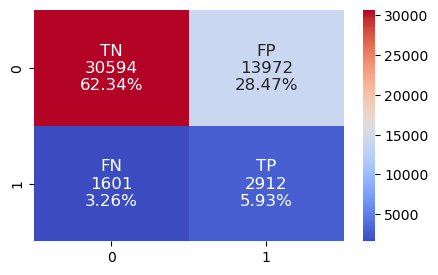

In [168]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=123)
logr.fit(X_train_rus, y_train_rus)

predict(logr)

### Logistic Regression Tuning
---

In [169]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# -------------------------------------------------------------------------------
# weights = np.linspace(0.0,0.99,200)
param_distributions = {'class_weight': [{0: 7, 1: 3}],
                       'C': np.logspace(-3, 3, 7),
                       'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                      }

# -------------------------------------------------------------------------------
logreg = LogisticRegression(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
logreg_tuned = model_selection.RandomizedSearchCV(logreg, param_distributions, n_jobs = -1,
                                   n_iter=100, cv=kfold, scoring='roc_auc', random_state=123)

# fit model
logreg_tuned.fit(X_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", logreg_tuned.best_params_)

Best parameters:  {'solver': 'newton-cg', 'class_weight': {0: 7, 1: 3}, 'C': 0.01}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     44566
           1       0.27      0.27      0.27      4513

    accuracy                           0.86     49079
   macro avg       0.60      0.60      0.60     49079
weighted avg       0.87      0.86      0.86     49079

------------------------------------------------------- 

AUC Test score: 0.73
AUC Train scores: 0.7289
------------------------------------------------------- 



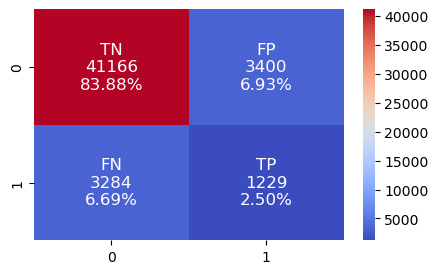

In [170]:
predict(logreg_tuned)

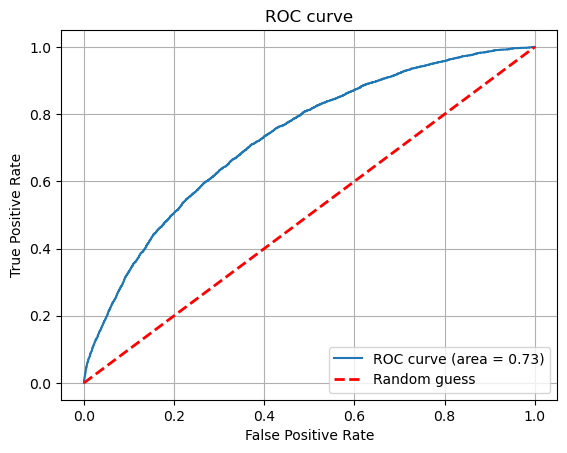

In [171]:
plot_roc(logreg_tuned, X_test, y_test)

### Logistic Regression Importance Feature
---

In [178]:
logr_model = LogisticRegression(random_state=123, solver='saga', class_weight={0: 7, 1: 3}, C=0.001)
logr_model.fit(X_train_rus, y_train_rus)

LogisticRegression(C=0.001, class_weight={0: 7, 1: 3}, random_state=123,
                   solver='saga')

In [192]:
print("Classes:", logr_model.classes_)
print("Number of classes:", len(logr_model.classes_))
print("Feature names:", X.columns)
print("Model coefficients shape:", logr_model.coef_.shape)

Classes: [0 1]
Number of classes: 2
Feature names: Index(['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE',
       'EXT_SOURCE_3', 'EXT_SOURCE_2', 'YEAR_EMPLOYED', 'AGE',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'YEAR_ID_PUBLISH', 'MONTH_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'DEF_30_CNT_SOCIAL_CIRCLE', 'YEAR_REGISTRATION',
       'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN'],
      dtype='object')
Model coefficients shape: (1, 18)


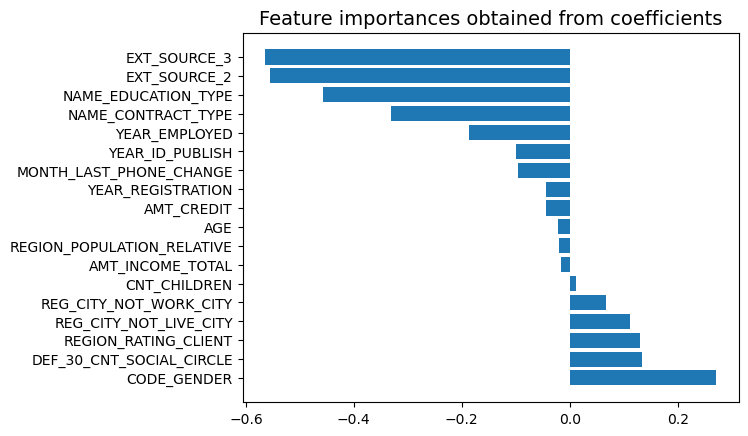

In [193]:
# dataframe fitur
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': logr_model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

# -----------------------------------------------------------------------
# visualisasi
plt.barh(y=importances['Attribute'], width=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=14)
plt.show()

### Random Forest Pre-Tuning
---

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.68      0.80     44566
           1       0.17      0.65      0.27      4513

    accuracy                           0.68     49079
   macro avg       0.56      0.67      0.53     49079
weighted avg       0.88      0.68      0.75     49079

------------------------------------------------------- 

AUC Test score: 0.7243
AUC Train scores: 1.0
------------------------------------------------------- 



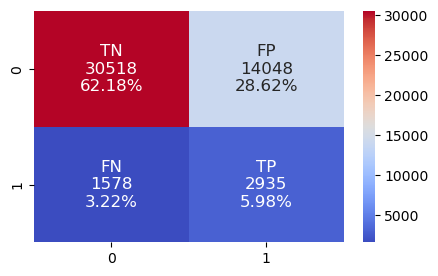

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)
rf.fit(X_train_rus, y_train_rus)

predict(rf)

### Random Forest Tuning
---

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection

# -------------------------------------------------------------------------------
param_distributions = { 
    'n_estimators': [200, 300, 400, 600],
    'max_depth': [None, 5, 10, 20],
    # 'min_samples_split': [4, 6, 8],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2'], 
    'class_weight': [{0: 7, 1: 3}]
    # 'class_weight': ['balanced', 'balanced_subsample', None]
                      }

# -------------------------------------------------------------------------------
rf = RandomForestClassifier(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
rf_tuned = model_selection.RandomizedSearchCV(rf, param_distributions, n_jobs = -1, cv=kfold, scoring='roc_auc', random_state=123)

# fit model
rf_tuned.fit(X_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", rf_tuned.best_params_)

Best parameters:  {'n_estimators': 400, 'max_depth': 10, 'class_weight': {0: 7, 1: 3}}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     44566
           1       0.26      0.29      0.28      4513

    accuracy                           0.86     49079
   macro avg       0.60      0.60      0.60     49079
weighted avg       0.87      0.86      0.86     49079

------------------------------------------------------- 

AUC Test score: 0.7295
AUC Train scores: 0.8191
------------------------------------------------------- 



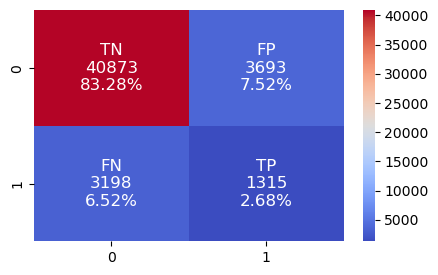

In [89]:
predict(rf_tuned)

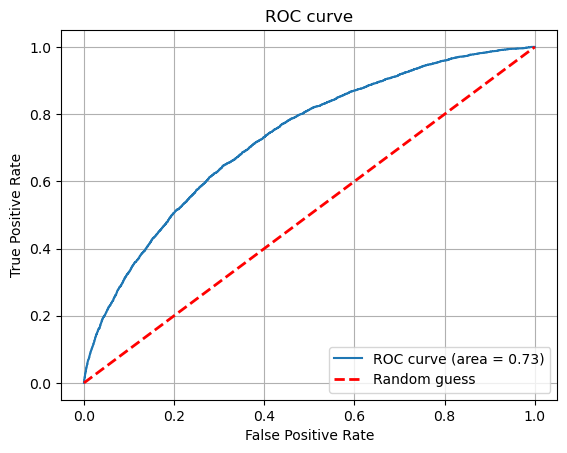

In [90]:
plot_roc(rf_tuned, X_test, y_test)

### Random Forest Importance Feature
---

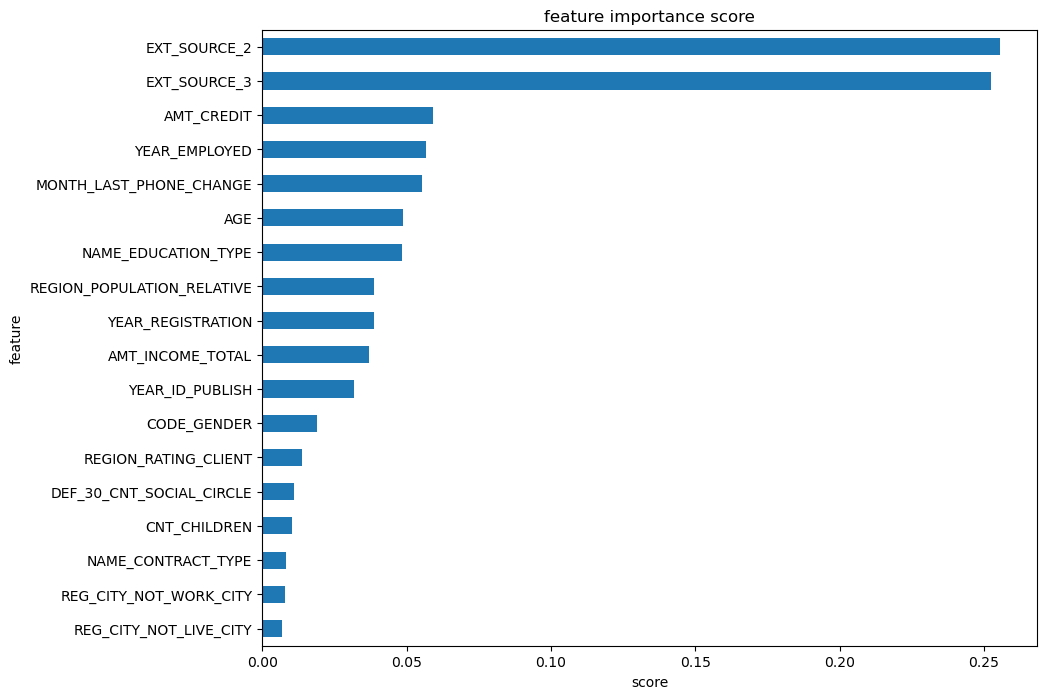

In [91]:
show_feature_importance(rf_tuned.best_estimator_)

### XgBoost Pre-Tuning
---

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.67      0.79     44566
           1       0.17      0.66      0.27      4513

    accuracy                           0.67     49079
   macro avg       0.56      0.66      0.53     49079
weighted avg       0.88      0.67      0.74     49079

------------------------------------------------------- 

AUC Test score: 0.7234
AUC Train scores: 0.8656
------------------------------------------------------- 



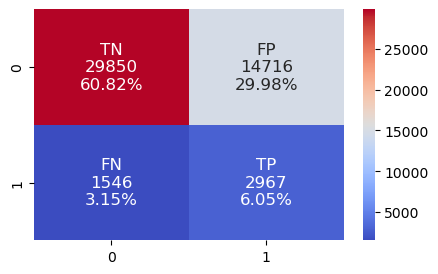

In [92]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=123)
xgb.fit(X_train_rus, y_train_rus)

predict(xgb)

### XgBoost Tuning
---

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection

# -------------------------------------------------------------------------------
param_distributions = { 
    'learning_rate': [0.1, 0.2, 0,3, 0.4],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0, 1.5, 2.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                      }

# -------------------------------------------------------------------------------
xgb = XGBClassifier(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
xgb_tuned = model_selection.RandomizedSearchCV(xgb, param_distributions, n_jobs = -1, cv=kfold, scoring='roc_auc', random_state=123)

# fit model
xgb_tuned.fit(X_train_rus, y_train_rus)

# -------------------------------------------------------------------------------
print("Best parameters: ", xgb_tuned.best_params_)

Best parameters:  {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.68      0.80     44566
           1       0.18      0.67      0.28      4513

    accuracy                           0.68     49079
   macro avg       0.56      0.68      0.54     49079
weighted avg       0.88      0.68      0.75     49079

------------------------------------------------------- 

AUC Test score: 0.7364
AUC Train scores: 0.7474
------------------------------------------------------- 



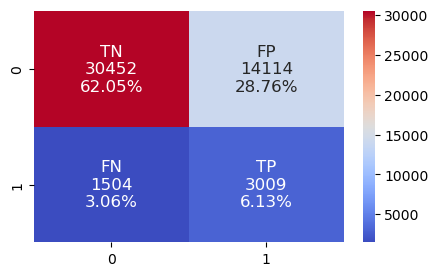

In [94]:
predict(xgb_tuned)

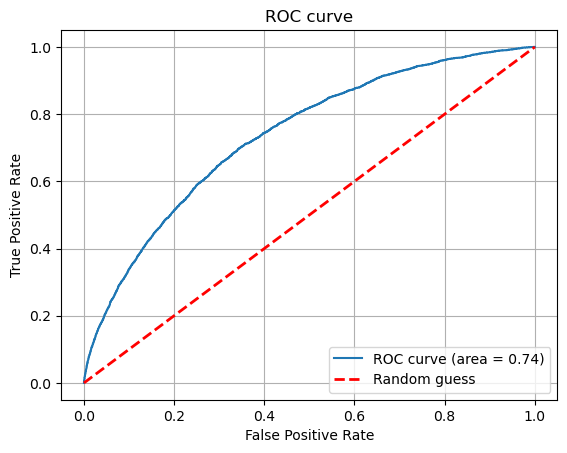

In [95]:
plot_roc(xgb_tuned, X_test, y_test)

### XgBoost Importance Feature
---

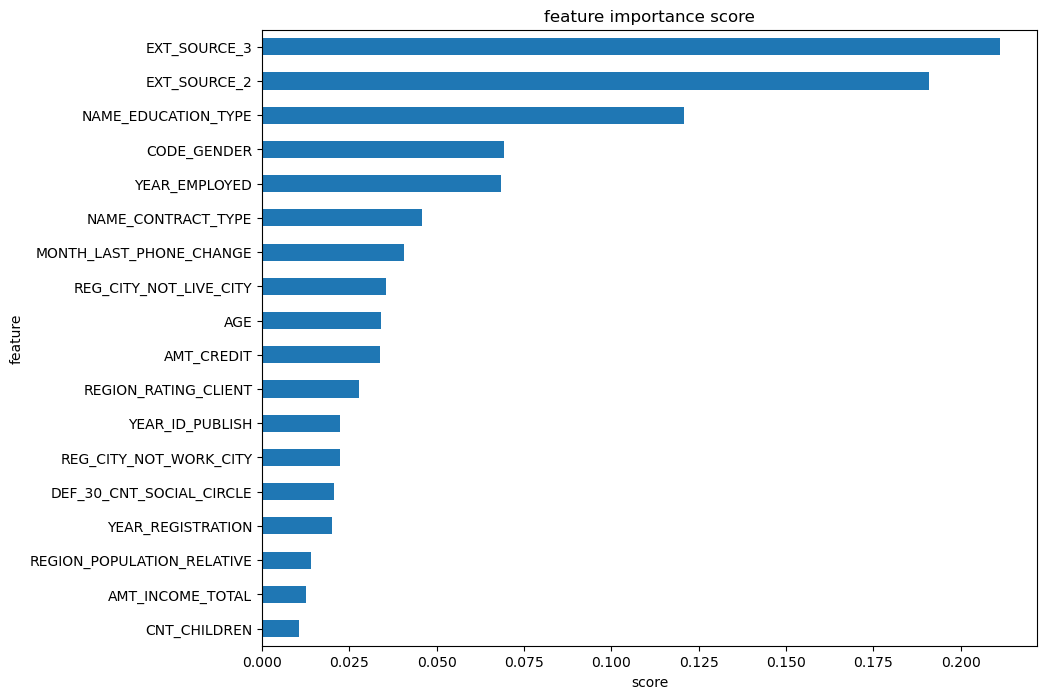

In [96]:
show_feature_importance(xgb_tuned.best_estimator_)

## **Built Model and Save**

In [100]:
df_model_selected = df_model.copy()

In [102]:
df_model_selected.sample(5)

,NAME_EDUCATION_TYPE,CODE_GENDER,NAME_CONTRACT_TYPE,EXT_SOURCE_3,EXT_SOURCE_2,YEAR_EMPLOYED,AGE,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,YEAR_ID_PUBLISH,MONTH_LAST_PHONE_CHANGE,AMT_CREDIT,DEF_30_CNT_SOCIAL_CIRCLE,YEAR_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,CNT_CHILDREN,TARGET
189910,1,1,0,0.535276,0.082660,6.0,44.0,3,0,0,3.0,6.0,234000.0,0.0,1.0,0.018209,135000.0,3,0
82787,1,0,0,0.477649,0.422525,5.0,41.0,2,1,0,11.0,26.0,307111.5,0.0,8.0,0.010032,247500.0,0,0
296935,3,0,0,0.535276,0.699226,5.0,30.0,2,0,0,9.0,85.0,778446.0,0.0,3.0,0.014464,157500.0,1,0
234521,1,1,0,0.237916,0.443735,5.0,37.0,3,0,0,8.0,18.0,1575000.0,0.0,3.0,0.018029,225000.0,1,0
179767,1,1,1,0.722393,0.338161,8.0,46.0,3,0,0,4.0,62.0,180000.0,0.0,2.0,0.020246,135000.0,0,0


In [109]:
feats_lr = [
    'NAME_EDUCATION_TYPE', 
    'CODE_GENDER',
    'NAME_CONTRACT_TYPE',
    'EXT_SOURCE_3',
    'EXT_SOURCE_2',
    'YEAR_EMPLOYED',
    'AGE',
    'YEAR_ID_PUBLISH',
    'AMT_CREDIT',
    'AMT_INCOME_TOTAL',
    'TARGET']
df_lr = df_model_selected[feats_lr]

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     44566
           1       0.27      0.25      0.26      4513

    accuracy                           0.87     49079
   macro avg       0.60      0.59      0.59     49079
weighted avg       0.86      0.87      0.87     49079

------------------------------------------------------- 

AUC Test score: 0.7264
AUC Train scores: 0.7259
------------------------------------------------------- 



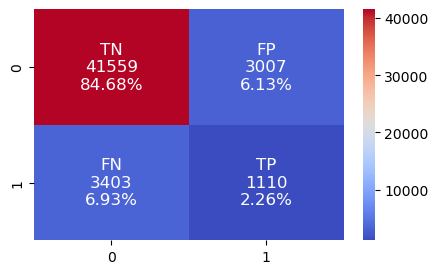

In [110]:
# Prepare
X = df_lr.drop(columns='TARGET').copy()
y = df_lr['TARGET'].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

rus = RandomUnderSampler(random_state=123)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Modeling
logr_model = LogisticRegression(random_state=123, solver='saga', class_weight={0: 7, 1: 3}, C=0.001)
logr_model.fit(X_train_rus, y_train_rus)

predict(logr_model)

In [111]:
import joblib
joblib.dump(logr_model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [ ]:
df_model_selected[df_model_selected['TARGET'] == 1].sample(5)

,NAME_EDUCATION_TYPE,CODE_GENDER,NAME_CONTRACT_TYPE,EXT_SOURCE_3,EXT_SOURCE_2,YEAR_EMPLOYED,AGE,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,YEAR_ID_PUBLISH,MONTH_LAST_PHONE_CHANGE,AMT_CREDIT,DEF_30_CNT_SOCIAL_CIRCLE,YEAR_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,CNT_CHILDREN,TARGET
109741,3,1,0,0.753067,0.184253,24.0,52.0,2,0,0,5.0,54.0,545040.0,0.0,6.0,0.022625,225000.0,0,1
195107,1,1,0,0.535276,0.736444,9.0,51.0,2,0,0,5.0,27.0,269550.0,0.0,20.0,0.007020,157500.0,0,1
221386,1,0,0,0.646330,0.751363,16.0,53.0,2,0,0,7.0,97.0,585000.0,0.0,1.0,0.026392,157500.0,0,1
174247,1,1,0,0.499272,0.159679,1.0,36.0,2,0,0,12.0,84.0,545040.0,0.0,19.0,0.030755,126000.0,0,1
132921,3,1,0,0.481249,0.548688,16.0,34.0,2,0,0,11.0,17.0,213588.0,1.0,3.0,0.019101,135000.0,2,1


In [121]:
df_model_selected.sample(5)

,NAME_EDUCATION_TYPE,CODE_GENDER,NAME_CONTRACT_TYPE,EXT_SOURCE_3,EXT_SOURCE_2,YEAR_EMPLOYED,AGE,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,YEAR_ID_PUBLISH,MONTH_LAST_PHONE_CHANGE,AMT_CREDIT,DEF_30_CNT_SOCIAL_CIRCLE,YEAR_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,CNT_CHILDREN,TARGET
1411,1,0,0,0.759712,0.231927,4.0,48.0,2,0,0,3.0,11.0,900000.0,0.0,25.0,0.008575,144000.0,0,0
306219,1,0,0,0.258084,0.382570,5.0,53.0,2,0,0,8.0,51.0,1021707.0,1.0,27.0,0.007274,202500.0,0,0
240986,1,0,0,0.535276,0.432995,14.0,56.0,1,0,0,11.0,9.0,481176.0,0.0,21.0,0.032561,247500.0,0,0
102551,2,0,0,0.392774,0.505102,3.0,27.0,2,0,0,7.0,11.0,1223010.0,0.0,6.0,0.018801,360000.0,0,0
75985,1,0,0,0.535276,0.447376,0.0,46.0,3,0,0,1.0,15.0,90000.0,0.0,1.0,0.020246,112500.0,0,0


## **Test Model**

In [122]:
model = joblib.load('logistic_regression_model.joblib')

In [153]:
def predict():
    X = pd.DataFrame(
        {
            'NAME_EDUCATION_TYPE': NAME_EDUCATION_TYPE, 
            'CODE_GENDER': CODE_GENDER,
            'NAME_CONTRACT_TYPE': NAME_CONTRACT_TYPE,
            'EXT_SOURCE_3': EXT_SOURCE_3,
            'EXT_SOURCE_2': EXT_SOURCE_2,
            'YEAR_EMPLOYED': YEAR_EMPLOYED,
            'AGE': AGE,
            'YEAR_ID_PUBLISH': YEAR_ID_PUBLISH,
            'AMT_CREDIT': AMT_CREDIT,
            'AMT_INCOME_TOTAL': AMT_INCOME_TOTAL
        }, index=[0]
    )

    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    prediction = model.predict(X)[0]
    return prediction


In [151]:
NAME_EDUCATION_TYPE = 3
CODE_GENDER=0
NAME_CONTRACT_TYPE=0
EXT_SOURCE_3=0
EXT_SOURCE_2=0
YEAR_EMPLOYED= 24
AGE=52
YEAR_ID_PUBLISH=0
AMT_CREDIT=5040.0
AMT_INCOME_TOTAL=2200.0

In [152]:
predict()

0

Model mayoritas cenderung memprediksi kelas 0, mungkin fitur cenderung berpengaruh pada kelas 0. Untuk pengembangan selanjutnya:
- Evaluasi kembali
- Mencoba dengan evaluasi PR-AUC
- Mencoba metode lainnya seperti scorecard